# Ferguson_Damian_DA201_Assignment_Notebook
## Document Structure
To make this notebook easier to read, I have split it into two sections.  The first section covers the analytical process and analysis I have conducted to complete the assignment.  The second section covers the weekly assignment activities.

# SECTION 1: Assignment - Diagnostic Analysis Using Python

## Analytical Approach

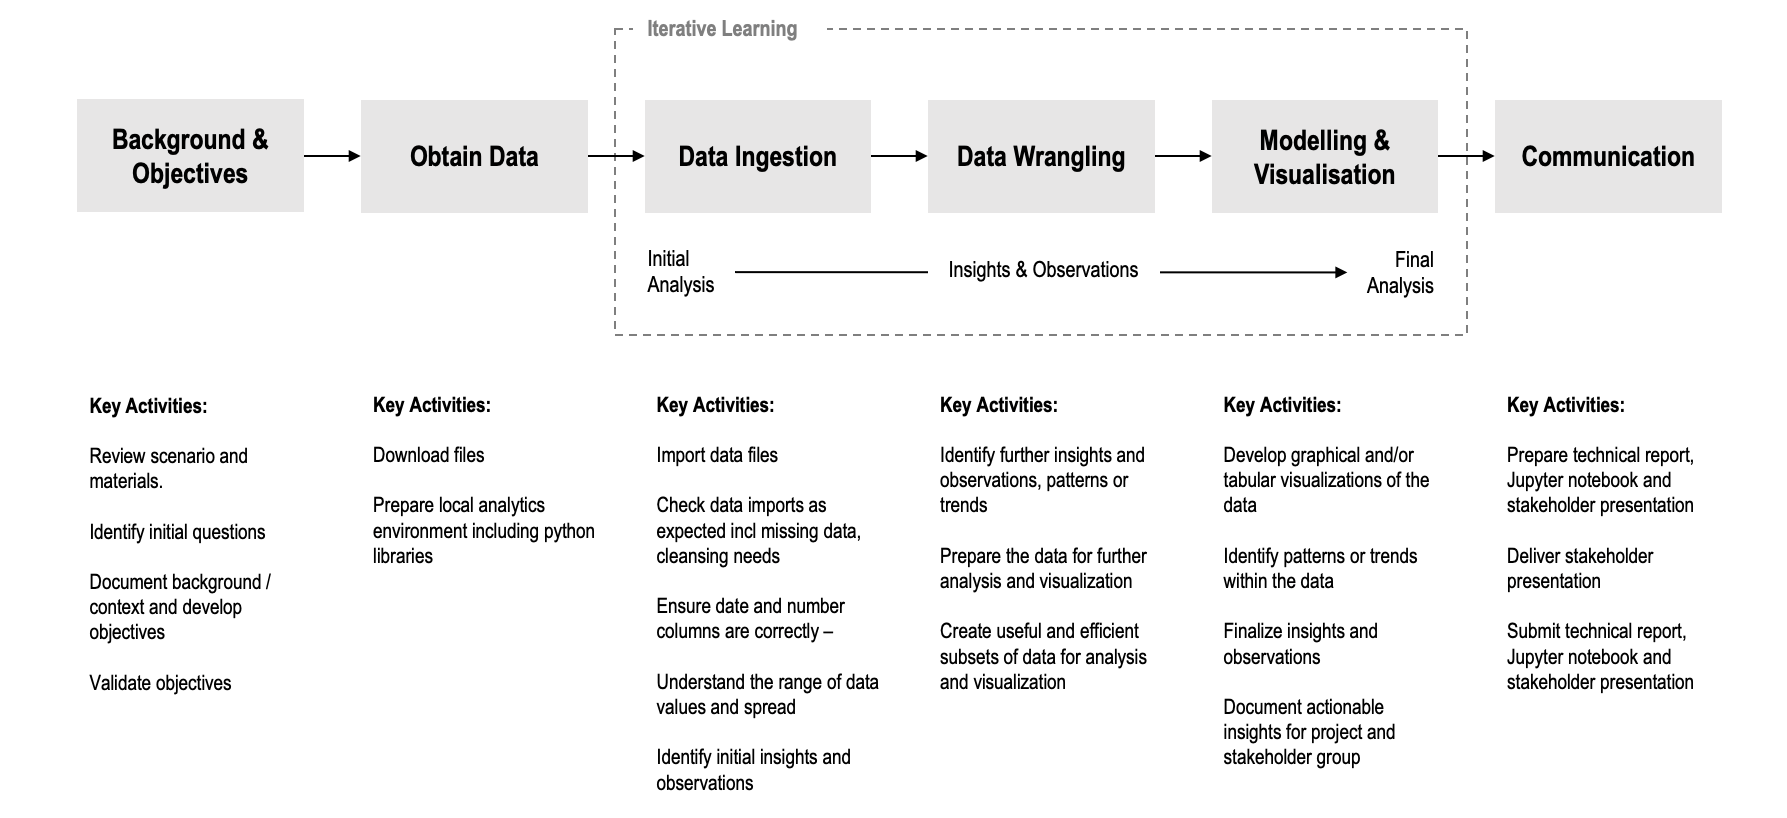

## Background & Objectives

The NHS needs more capacity to support an increasing population.  Some stakeholders believe capacity should be added through investment others believe resources should be better utilised.<br><br>
The NHS needs to understand current utilisation and trends within its’ network to make the right decision(s).  The NHS believes missed GP appointments contribute to lower utilisation.  To determine if this is true, utilisation of current resources needs to be understood and two questions have been posed:
- Has there been adequate staff and capacity in the networks?
- What was the actual utilisation of resources?<br>

Null hypotheses:
- There is adequate staff and capacity in the network.
- Missed GP appointments do not cause resource utilisation to be low.


## Obtain Data

### Set up the environment

In [1]:
# Import the required python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from datetime import datetime
from matplotlib import ticker
from matplotlib.ticker import PercentFormatter

### Import the data

In [2]:
# Import the actual_duration data.
ad = pd.read_csv('actual_duration.csv')

# Check data loaded.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [3]:
# Import the appointments_regional data.
ar = pd.read_csv('appointments_regional.csv')

# Check data loaded.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [4]:
# Import the national_categories data.
nc = pd.read_excel('national_categories.xlsx')

# Check data loaded.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


## Data Ingestion

### Check the 'actual_duration' data

In [5]:
# Check columns, data types and non-null values and print first five rows.
print(ad.info())
ad

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [6]:
# View more information about the object columns.
ad.describe(include='object')

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration
count,137793,137793,137793,137793,137793,137793,137793
unique,106,106,106,42,7,212,7
top,26A,E38000239,NHS Norfolk and Waveney ICB - 26A,E54000057,E40000010,01-Dec-21,Unknown / Data Quality
freq,1484,1484,1484,12668,33112,742,20161


In [7]:
# View more information about the int column.
ad.describe(include='int')

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


The distance between the 75th percentile and max values of 'count_of_appointments' suggests presence of outliers.

In [8]:
# What is the total number of appointments included in the data set?
print("Total number of appts =", ad['count_of_appointments'].sum())

Total number of appts = 167980692


#### Notes and observations (ad):
- Columns = 8, Rows = 137,793
- No missing values
- 'count_of_appointments' will need to be converted from 'int' to 'float'
- 'appointment_date' will need to be converted from 'object' to 'datetime'
- There are 106 values values for 'sub_icb_location_code', 'sub_icb_location_ons_code' and 'sub_icb_location_name'. This suggests they represent the same "thing"
- 'icb_ons_code' has 42 different values
- 'region_ons_code' has 7 different values
- 'appointment_date' has 212 different values
- 'actual_duration' has 7 values
- 'count_of_appointments': 137,793 records, appears to contain outliers.
- Total number of appts = 167,980,692

### Check the 'appointments_regional' data

In [9]:
# Check columns, data types and non-null values and print first five rows.
print(ar.info())
ar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [10]:
# View more information about the object columns.
ar.describe(include='object')

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment
count,596821,596821,596821,596821,596821,596821
unique,42,30,3,3,5,8
top,E54000057,2020-03,Attended,Other Practice staff,Face-to-Face,Same Day
freq,54527,21350,232137,241557,180410,95502


In [11]:
# View more information about the int column.
ar.describe(include='int')

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


The distance between the 75th percentile and max values of 'count_of_appointments' suggests presence of outliers.

In [12]:
# What is the total number of appointments included in the data set?
print("Total number of appts =", ar['count_of_appointments'].sum())

Total number of appts = 742804525


#### Notes and observations (ar):
- Columns = 7, Rows = 596,821
- No missing values
- 'count_of_appointments' will need to be converted from 'int' to 'float'
- 'appointment_month' will need to be converted from 'object' to 'datetime'
- 'icb_ons_code' has 42 different values
- 'appointment_month' has 30 different values
- 'appointment_status' has 3 different values
- 'hcp_type' has 3 values
- 'appointment_mode' has 5 values
- 'time_between_book_and_appointment' has 8 values
- 'count_of_appointments': 596,821 records, appears to contain outliers.
- Total number of appts = 742,804,525

### Check the 'national_categories' data

In [13]:
# Check columns, data types and non-null values and print first five rows.
print(nc.info())
nc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [14]:
# View more information about the object columns.
nc.describe(include='object')

,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,appointment_month
count,817394,817394,817394,817394,817394,817394
unique,42,106,5,3,18,11
top,E54000057,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Inconsistent Mapping,2022-03
freq,59180,13007,359274,700481,89494,82822


In [15]:
# View more information about the int column.
nc.describe(include='int')

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


The distance between the 75th percentile and max values of 'count_of_appointments' suggests presence of outliers.

In [16]:
# View more information about the datetime column.
nc.describe(include='datetime')

,appointment_date
count,817394
mean,2022-01-16 00:50:35.860796160
min,2021-08-01 00:00:00
25%,2021-10-25 00:00:00
50%,2022-01-18 00:00:00
75%,2022-04-07 00:00:00
max,2022-06-30 00:00:00


In [17]:
# What is the total number of appointments included in the data set?
print("Total number of appts =", nc['count_of_appointments'].sum())

Total number of appts = 296046770


#### Notes and observations (nc):
- Columns = 8, Rows = 817,394
- No missing values
- 'count_of_appointments' will need to be converted from 'int' to 'float'
- 'appointment_month' will need to be converted from 'object' to 'datetime'
- 'appointment_date' has 334 different values, but is in correct 'datetime' format
- 'icb_ons_code' has 42 different values
- 'sub_icb_location_name' has 106 different values
- 'service_setting' has 5 different values
- 'context_type' has 3 different values
- 'national_category' has 18 different values
- 'count_of_appointments': 817,394 records, not normally distributed, contains outliers.
- Total number of appts = 296,046,770

### Notes and observations (overall):
- 'icb_ons_code' and 'count_of_appointments' are common to all three data sets.
- Extracting 'appointment_month' from 'appointment_date' in ar will make 'appointment_month' common to all three data sets too.

### Ensure date and number columns are correctly formatted

#### actual_duration data

In [18]:
# Change data types for actual_duration data file.
# Object to datetime.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format = '%d-%b-%y')

# Int to float.
ad['count_of_appointments'] = ad['count_of_appointments'].astype('float')

# Check columns, data types and non-null values.
print(ad.info())

# View ten random records to check date and number converted correctly.
ad[['appointment_date', 'count_of_appointments']].sample(n = 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   sub_icb_location_code      137793 non-null  object        
 1   sub_icb_location_ons_code  137793 non-null  object        
 2   sub_icb_location_name      137793 non-null  object        
 3   icb_ons_code               137793 non-null  object        
 4   region_ons_code            137793 non-null  object        
 5   appointment_date           137793 non-null  datetime64[ns]
 6   actual_duration            137793 non-null  object        
 7   count_of_appointments      137793 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 8.4+ MB
None


,appointment_date,count_of_appointments
1376,2022-01-06,1194.0
118274,2022-03-25,1053.0
108333,2022-03-14,10361.0
26710,2022-01-31,151.0
115676,2022-04-27,4575.0
57062,2022-05-10,599.0
21603,2021-12-04,12.0
81303,2022-06-24,384.0
72787,2022-03-31,2211.0
9571,2022-06-23,288.0


#### appointments_regional data

In [19]:
# Change data types for appointments_regional data file.
# Object to datetime.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'],format='%Y-%m').dt.to_period('M')

# Int to float.
ar['count_of_appointments'] = ar['count_of_appointments'].astype('float')

# Check columns, data types and non-null values.
print(ar.info())

# View ten random records to check date and number converted correctly.
ar[['appointment_month', 'count_of_appointments']].sample(n = 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype    
---  ------                             --------------   -----    
 0   icb_ons_code                       596821 non-null  object   
 1   appointment_month                  596821 non-null  period[M]
 2   appointment_status                 596821 non-null  object   
 3   hcp_type                           596821 non-null  object   
 4   appointment_mode                   596821 non-null  object   
 5   time_between_book_and_appointment  596821 non-null  object   
 6   count_of_appointments              596821 non-null  float64  
dtypes: float64(1), object(5), period[M](1)
memory usage: 31.9+ MB
None


,appointment_month,count_of_appointments
268919,2021-03,852.0
219946,2022-01,49.0
248302,2022-01,10173.0
530178,2020-04,20.0
533800,2021-10,3.0
315911,2021-04,41.0
263787,2021-05,142.0
482735,2020-02,29.0
373739,2022-01,1.0
485186,2021-05,111.0


#### national_categories data

In [20]:
# Change data types for national_categories data file.
# Object to datetime.
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'],format='%Y-%m').dt.to_period('M')

# Int to float.
nc['count_of_appointments'] = nc['count_of_appointments'].astype('float')

# Check columns, data types and non-null values.
print(nc.info())

# View ten random records to check date and number converted correctly.
nc[['appointment_month', 'count_of_appointments']].sample(n = 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  float64       
 7   appointment_month      817394 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), object(5), period[M](1)
memory usage: 49.9+ MB
None


,appointment_month,count_of_appointments
48428,2021-12,1514.0
416626,2022-04,28.0
17559,2021-10,1.0
811402,2021-12,121.0
616285,2022-01,104.0
719127,2022-02,121.0
13566,2021-12,4.0
547683,2021-10,362.0
346323,2021-08,6.0
130154,2022-06,19.0


#### Extract appointment_month from appointment_date in actual_duration data set

In [21]:
# Create new column appointment_month.
ad['appointment_month'] = ad['appointment_date'].dt.to_period('m')

# Check it worked.
print(ad.info())
ad.sample(n = 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   sub_icb_location_code      137793 non-null  object        
 1   sub_icb_location_ons_code  137793 non-null  object        
 2   sub_icb_location_name      137793 non-null  object        
 3   icb_ons_code               137793 non-null  object        
 4   region_ons_code            137793 non-null  object        
 5   appointment_date           137793 non-null  datetime64[ns]
 6   actual_duration            137793 non-null  object        
 7   count_of_appointments      137793 non-null  float64       
 8   appointment_month          137793 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), object(6), period[M](1)
memory usage: 9.5+ MB
None


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments,appointment_month
5721,00R,E38000015,NHS Lancashire and South Cumbria ICB - 00R,E54000048,E40000010,2022-06-29,1-5 Minutes,449.0,2022-06
131172,D9Y0V,E38000253,NHS Hampshire and Isle Of Wight ICB - D9Y0V,E54000042,E40000005,2022-01-27,31-60 Minutes,1929.0,2022-01
31560,02M,E38000226,NHS Lancashire and South Cumbria ICB - 02M,E54000048,E40000010,2022-02-04,1-5 Minutes,316.0,2022-02
126035,A3A8R,E38000255,NHS North East London ICB - A3A8R,E54000029,E40000003,2022-03-31,1-5 Minutes,4844.0,2022-03
87296,15C,E38000222,NHS Bristol North Somerset and South Glouceste...,E54000039,E40000006,2022-02-27,31-60 Minutes,1.0,2022-02


### Understand the range of dates

In [22]:
# Check the min and max appointment_dates for ad and nc.
print("AD appointment dates min = ", ad['appointment_date'].min(), "and max =",
      ad['appointment_date'].max())
print("NC appointment dates min = ", nc['appointment_date'].min(), "and max =",
      nc['appointment_date'].max())

print()

# Check the min and max appointment_months for ar and nc.
print("AR appointment month min = ", ar['appointment_month'].min(), "and max =",
      ar['appointment_month'].max())
print("NC appointment month min = ", nc['appointment_month'].min(), "and max =",
      nc['appointment_month'].max())
print("AD appointment month min = ", ad['appointment_month'].min(), "and max =",
      ad['appointment_month'].max())

AD appointment dates min =  2021-12-01 00:00:00 and max = 2022-06-30 00:00:00
NC appointment dates min =  2021-08-01 00:00:00 and max = 2022-06-30 00:00:00

AR appointment month min =  2020-01 and max = 2022-06
NC appointment month min =  2021-08 and max = 2022-06
AD appointment month min =  2021-12 and max = 2022-06


#### Question: Do the number of appointments match where the dates overlap between December 2021 and June 2022?

In [23]:
nc_overlap = pd.DataFrame(nc, columns = ['appointment_date', 'count_of_appointments']) [(nc['appointment_date'] >= '2021-12-01') &
                                       (nc['appointment_date'] <= '2022-06-30')]
print("Total appts in overlapping time period in nc =", nc_overlap['count_of_appointments'].sum())

Total appts in overlapping time period in nc = 182963194.0


In [24]:
ad_overlap = pd.DataFrame(ad, columns = ['appointment_date', 'count_of_appointments']) [(ad['appointment_date'] >= '2021-12-01') &
                                       (ad['appointment_date'] <= '2022-06-30')]
print("Total appts in overlapping time period in ad =", ad_overlap['count_of_appointments'].sum())

Total appts in overlapping time period in ad = 167980692.0


In [25]:
ar_overlap = pd.DataFrame(ar, columns = ['appointment_month', 'count_of_appointments']) [(ar['appointment_month'] >= '2021-12') &
                                       (ar['appointment_month'] <= '2022-06')]
print("Total appts in overlapping time period in ar =", ar_overlap['count_of_appointments'].sum())

Total appts in overlapping time period in ar = 182963194.0


#### Notes and observations:
- The data in the three data sets only overlaps from Dec 2021 to Jun 2022.
- The data in nc and ar overlap from Aug 2021 to Jun 2022.
- Total number of appts in nc and ar are the same for the overlapping time period, but different in ad (approximately 8% lower).  This suggests mc and ar are from the same data source and there maybe an opportunity to merge together.  Why is ad different?

### Understand the range of categorical values

#### actual_duration data

In [26]:
# Print values and value counts.
ad['actual_duration'].value_counts()

actual_duration
Unknown / Data Quality    20161
1-5 Minutes               19909
6-10 Minutes              19902
11-15 Minutes             19738
16-20 Minutes             19534
21-30 Minutes             19452
31-60 Minutes             19097
Name: count, dtype: int64

#### appointments_regional data

In [27]:
# Print values and value counts.
ar['hcp_type'].value_counts()

hcp_type
Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: count, dtype: int64

In [28]:
# Print values and value counts.
ar['appointment_mode'].value_counts()

appointment_mode
Face-to-Face    180410
Telephone       166483
Home Visit      111194
Unknown          79147
Video/Online     59587
Name: count, dtype: int64

In [29]:
# Print values and value counts.
ar['time_between_book_and_appointment'].value_counts()

time_between_book_and_appointment
Same Day                  95502
2 to 7 Days               92409
1 Day                     88957
8  to 14 Days             82698
15  to 21 Days            73666
22  to 28 Days            68755
More than 28 Days         65147
Unknown / Data Quality    29687
Name: count, dtype: int64

#### national_categories data

In [30]:
# Print values and value counts.
nc['service_setting'].value_counts()

service_setting
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: count, dtype: int64

In [31]:
# Print values and value counts.
nc['context_type'].value_counts()

context_type
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: count, dtype: int64

In [32]:
# Print values and value counts.
nc['national_category'].value_counts()

national_category
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                           

#### Notes and observations:
- ad Actual Duration has 7 unique values
- ar Health Care Professional has 3 unique values
- ar Appointment Status has 3 unique values
- ar Appointment Mode has 5 unique values
- ar Time From Book To Appt has 8 unique values
- nc Service Setting has 5 unique values
- nc Context Type has 3 unique values
- nc National Category has 18 unique values

### Understand the values of categorical data: 'location' and 'ONS' columns
Are all of the fields related to location and ONS needed?  If not, can the data be simplified and / or columns removed for efficiency?

In [33]:
# View a random sample of the data in what appears to be a column-herarchical order.
ad[['region_ons_code', 'icb_ons_code', 'sub_icb_location_ons_code',
    'sub_icb_location_code', 'sub_icb_location_name']].sample(n = 5)

,region_ons_code,icb_ons_code,sub_icb_location_ons_code,sub_icb_location_code,sub_icb_location_name
32151,E40000010,E54000048,E38000226,02M,NHS Lancashire and South Cumbria ICB - 02M
105005,E40000005,E54000053,E38000248,70F,NHS Sussex ICB - 70F
29229,E40000010,E54000048,E38000200,02G,NHS Lancashire and South Cumbria ICB - 02G
33203,E40000012,E54000061,E38000006,02P,NHS South Yorkshire ICB - 02P
2101,E40000012,E54000050,E38000163,00N,NHS North East and North Cumbria ICB - 00N


In [34]:
# View the relationship between region ons code and ons code.
ad[['region_ons_code', 'icb_ons_code']].drop_duplicates().groupby('region_ons_code').count().\
sort_values('icb_ons_code', ascending = False)

,icb_ons_code
region_ons_code,
E40000011,11
E40000006,7
E40000005,6
E40000007,6
E40000003,5
E40000012,4
E40000010,3


In [35]:
# View the relationship between ons code and location ons code.
ad[['icb_ons_code', 'sub_icb_location_ons_code']].drop_duplicates().groupby('icb_ons_code').count().\
sort_values('sub_icb_location_ons_code', ascending = False)

,sub_icb_location_ons_code
icb_ons_code,
E54000057,10
E54000008,9
E54000048,8
E54000050,8
E54000010,6
E54000051,6
E54000054,5
E54000026,5
E54000061,4


In [36]:
# View the relationship between location ons code and ons location code.
ad[['sub_icb_location_ons_code', 'sub_icb_location_code']].drop_duplicates().groupby('sub_icb_location_ons_code').count().\
sort_values('sub_icb_location_code', ascending = False)

,sub_icb_location_code
sub_icb_location_ons_code,
E38000006,1
E38000235,1
E38000233,1
E38000232,1
E38000231,1
...,...
E38000122,1
E38000119,1
E38000117,1


In [37]:
# View the relationship between location code and location name.
ad[['sub_icb_location_code', 'sub_icb_location_name']].drop_duplicates().groupby('sub_icb_location_code').count().\
sort_values('sub_icb_location_name', ascending = False)

,sub_icb_location_name
sub_icb_location_code,
00L,1
36L,1
27D,1
26A,1
18C,1
...,...
03F,1
02Y,1
02X,1


#### Notes and observations:
Based on the above analysis:
- There is a 1:M relationship between region_ons_code and icb_ons_code (eac region has many integrated care boards).
- There is a 1:M relationship between icb_ons_code and 'location' (each integrated care board has many locations).
- sub_icb_location_ons_code, sub_icb_location_code and sub_icb_location_name all have a 1:1 relationship, ie they all represent the same thing, ie location.
- Each value of sub_icb_location_name ends with sub_icb_location_code.
- Only 'icb_ons_code' is common to all three data sets.  The other columns appear to be redundant and unlikely to have any material impact on analysis, therefore will only keep 'icb_ons_code' and remove all other fields related to 'ONS' and 'location'.

### Remove redundant (no longer required) 'location' and 'ONS' columns

In [38]:
# Create final version of ad removing redundant columns and reordering columns for readability.
ad1 = ad[['icb_ons_code', 'appointment_month', 'appointment_date', 'actual_duration',
               'count_of_appointments']].copy()

# Check the changes.
print(ad1.info())
ad1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   icb_ons_code           137793 non-null  object        
 1   appointment_month      137793 non-null  period[M]     
 2   appointment_date       137793 non-null  datetime64[ns]
 3   actual_duration        137793 non-null  object        
 4   count_of_appointments  137793 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2), period[M](1)
memory usage: 5.3+ MB
None


,icb_ons_code,appointment_month,appointment_date,actual_duration,count_of_appointments
0,E54000050,2021-12,2021-12-01,31-60 Minutes,364.0
1,E54000050,2021-12,2021-12-01,21-30 Minutes,619.0
2,E54000050,2021-12,2021-12-01,6-10 Minutes,1698.0
3,E54000050,2021-12,2021-12-01,Unknown / Data Quality,1277.0
4,E54000050,2021-12,2021-12-01,16-20 Minutes,730.0


In [39]:
# Create final version of ad removing redundant columns and reordering columns for readability.
nc1 = nc[['icb_ons_code', 'appointment_month', 'appointment_date', 'service_setting',
               'context_type', 'national_category', 'count_of_appointments', ]].copy()

# Check the changes.
print(nc1.info())
nc1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   icb_ons_code           817394 non-null  object        
 1   appointment_month      817394 non-null  period[M]     
 2   appointment_date       817394 non-null  datetime64[ns]
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4), period[M](1)
memory usage: 43.7+ MB
None


,icb_ons_code,appointment_month,appointment_date,service_setting,context_type,national_category,count_of_appointments
0,E54000050,2021-08,2021-08-02,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3.0
1,E54000050,2021-08,2021-08-02,Other,Care Related Encounter,Planned Clinics,7.0
2,E54000050,2021-08,2021-08-02,General Practice,Care Related Encounter,Home Visit,79.0
3,E54000050,2021-08,2021-08-02,General Practice,Care Related Encounter,General Consultation Acute,725.0
4,E54000050,2021-08,2021-08-02,General Practice,Care Related Encounter,Structured Medication Review,2.0


In [40]:
# No change required for ar, but for consistency and to avoid any confusion change name to ar1.
ar1 = ar.copy()
print(ar1.info())
ar1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype    
---  ------                             --------------   -----    
 0   icb_ons_code                       596821 non-null  object   
 1   appointment_month                  596821 non-null  period[M]
 2   appointment_status                 596821 non-null  object   
 3   hcp_type                           596821 non-null  object   
 4   appointment_mode                   596821 non-null  object   
 5   time_between_book_and_appointment  596821 non-null  object   
 6   count_of_appointments              596821 non-null  float64  
dtypes: float64(1), object(5), period[M](1)
memory usage: 31.9+ MB
None


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107.0
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791.0
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686.0
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268.0
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971.0


### Identify initial insights and observations

#### actual_duration1 data

In [41]:
ad1.columns

Index(['icb_ons_code', 'appointment_month', 'appointment_date',
       'actual_duration', 'count_of_appointments'],
      dtype='object')

In [42]:
# Which actual duration types have the most appointments?
# Create subset of data.
ad_appts = pd.DataFrame(data = ad1[['actual_duration', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = ad_appts['count_of_appointments'].sum()
ad_appts['pct_contribution'] = (ad_appts['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
ad_appts.groupby('actual_duration').sum()\
    .sort_values('count_of_appointments', ascending = False)

,count_of_appointments,pct_contribution
actual_duration,,
Unknown / Data Quality,40284086.0,23.981379
6-10 Minutes,33800815.0,20.121845
1-5 Minutes,28600865.0,17.026281
11-15 Minutes,25160882.0,14.978437
16-20 Minutes,16004247.0,9.527432
21-30 Minutes,15026365.0,8.945293
31-60 Minutes,9103432.0,5.419332


In [43]:
# Which ICBs have the most appointments?
# Create subset of data.
icb_appts = pd.DataFrame(data = ad1[['icb_ons_code', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = icb_appts['count_of_appointments'].sum()
icb_appts['pct_contribution'] = (icb_appts['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
icb_appts.groupby('icb_ons_code').sum()\
    .sort_values('count_of_appointments', ascending = False)\
    .head(10)

,count_of_appointments,pct_contribution
icb_ons_code,,
E54000050,9584943.0,5.705979
E54000054,8291440.0,4.935948
E54000057,7650341.0,4.554298
E54000008,7344348.0,4.372138
E54000027,6976986.0,4.153445
E54000029,5341883.0,3.180058
E54000051,5248579.0,3.124513
E54000042,5242840.0,3.121097
E54000032,5209641.0,3.101333


#### Notes and observations:
- 24% of appointment durations are unknown, if this column is important will need to decide how to treat these records.  The values in thiscolumn could be used to develop a time based view of appointments ie using assumed time for each category * no of appts.
- There are 42 ICB ONS Codes, 10 of which account for 39% of appointments ... this is a wide spread of the appointment data which suggests ICB may not be important during the final analysis (to be validated).
- Look at appointments over time using later visualisations.

#### appintments_regional1 data

In [44]:
ar1.columns

Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')

In [45]:
# Which icbs have the top 10 most appointments?
# Create subset of ar data.
icb_appts = pd.DataFrame(data = ar1[['icb_ons_code', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = icb_appts['count_of_appointments'].sum()
icb_appts['pct_contribution'] = (icb_appts['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
icb_appts.groupby('icb_ons_code').sum().sort_values('count_of_appointments',
                                                    ascending = False).head(10)

,count_of_appointments,pct_contribution
icb_ons_code,,
E54000050,43083535.0,5.800117
E54000054,36090387.0,4.858665
E54000057,34080583.0,4.588096
E54000008,33099882.0,4.456069
E54000027,29380767.0,3.955383
E54000029,23594259.0,3.176375
E54000051,22983699.0,3.094179
E54000042,22968277.0,3.092102
E54000032,22623978.0,3.045751


In [46]:
# Which appointment statuses have the most appointments?
# Create subset of ar data.
appt_stat = pd.DataFrame(data = ar1[['appointment_status', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = appt_stat['count_of_appointments'].sum()
appt_stat['pct_contribution'] = (appt_stat['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
appt_stat.groupby('appointment_status').sum().sort_values('count_of_appointments',
                                                          ascending = False)

,count_of_appointments,pct_contribution
appointment_status,,
Attended,677755876.0,91.242831
Unknown,34137416.0,4.595747
DNA,30911233.0,4.161422


In [47]:
# Which HCPs have the most appointments?
# Create subset of ar data.
hcp_appts = pd.DataFrame(data = ar1[['hcp_type', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = hcp_appts['count_of_appointments'].sum()
hcp_appts['pct_contribution'] = (hcp_appts['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
hcp_appts.groupby('hcp_type').sum().sort_values('count_of_appointments',
                                                          ascending = False)

,count_of_appointments,pct_contribution
hcp_type,,
GP,379650140.0,51.110370
Other Practice staff,339650535.0,45.725426
Unknown,23503850.0,3.164204


In [48]:
# Which appointment modes have the most appointments?
# Create subset of ar data.
mode_appts = pd.DataFrame(data = ar1[['appointment_mode', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = mode_appts['count_of_appointments'].sum()
mode_appts['pct_contribution'] = (mode_appts['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
mode_appts.groupby('appointment_mode').sum().sort_values('count_of_appointments',
                                                          ascending = False)

,count_of_appointments,pct_contribution
appointment_mode,,
Face-to-Face,439981729.0,59.232505
Telephone,267862657.0,36.060989
Unknown,26451305.0,3.561005
Home Visit,4887876.0,0.658030
Video/Online,3620958.0,0.487471


In [49]:
# Which appointment modes have the most appointments?
# Create subset of ar data.
appt_mode = pd.DataFrame(data = ar[['appointment_mode', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = appt_mode['count_of_appointments'].sum()
appt_mode['pct_contribution'] = (appt_mode['count_of_appointments'] / total_appts)

# Display grouped result in descending order.
appt_mode.groupby('appointment_mode').sum().sort_values('count_of_appointments',
                                                          ascending = False)

,count_of_appointments,pct_contribution
appointment_mode,,
Face-to-Face,439981729.0,0.592325
Telephone,267862657.0,0.360610
Unknown,26451305.0,0.035610
Home Visit,4887876.0,0.006580
Video/Online,3620958.0,0.004875


In [50]:
# Which appointment time from book to appt have the most appointments?
# Create subset of ar data.
time_to_appt = pd.DataFrame(data = ar1[['time_between_book_and_appointment', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = time_to_appt['count_of_appointments'].sum()
time_to_appt['pct_contribution'] = (time_to_appt['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
time_to_appt.groupby('time_between_book_and_appointment').sum().sort_values('count_of_appointments',
                                                                            ascending = False)

,count_of_appointments,pct_contribution
time_between_book_and_appointment,,
Same Day,342747171.0,46.142311
2 to 7 Days,153794531.0,20.704576
8 to 14 Days,86846519.0,11.691706
1 Day,67716097.0,9.116274
15 to 21 Days,42710574.0,5.749908
22 to 28 Days,25536541.0,3.437855
More than 28 Days,23050987.0,3.103237
Unknown / Data Quality,402105.0,0.054133


#### Notes and observations:
- There are 42 ICB ONS Codes, 10 of which account for 39% of appointments ... this is a wide spread of the appointment data which suggests ICB may not be important during the final analysis (to be validated).  Looks approximately the same as ad1 data.
- 4% appts were DNA (missed), but a further 4% have an unkown status.  This may be important when looking at utilisation.
- Only 3% of Health care Professionals are unknown (good), with 51% GP and 46% Other Practice Staff.
- 95% of appointments were either F2F or over the telephone.
- Time Between Book And Appt could be interesting.  Does it change over time and does it have an impact on DNA?
- Look at appointments over time using later visualisations.

#### national_categories1 data

In [51]:
# Which icbs have the top 10 most appointments?
# Create subset of nc data.
icb_appts = pd.DataFrame(data = nc1[['icb_ons_code', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = icb_appts['count_of_appointments'].sum()
icb_appts['pct_contribution'] = (icb_appts['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
icb_appts.groupby('icb_ons_code').sum().sort_values('count_of_appointments',
                                                    ascending = False).head(10)

,count_of_appointments,pct_contribution
icb_ons_code,,
E54000050,16882235.0,5.702557
E54000054,14358371.0,4.850035
E54000057,13857900.0,4.680983
E54000008,13250311.0,4.475749
E54000027,12142390.0,4.101511
E54000029,9588891.0,3.238978
E54000032,9286167.0,3.136723
E54000042,9210625.0,3.111206
E54000051,9125945.0,3.082602


In [52]:
# Which service settings have the most appointments?
# Create subset of nc data.
appt_svcset = pd.DataFrame(data = nc1[['service_setting', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = appt_svcset['count_of_appointments'].sum()
appt_svcset['pct_contribution'] = (appt_svcset['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
appt_svcset.groupby('service_setting').sum().sort_values('count_of_appointments',
                                                         ascending = False)

,count_of_appointments,pct_contribution
service_setting,,
General Practice,270811691.0,91.475982
Unmapped,11080810.0,3.742925
Primary Care Network,6557386.0,2.214983
Other,5420076.0,1.830817
Extended Access Provision,2176807.0,0.735292


In [53]:
# Which context types have the most appointments?
# Create subset of nc data.
appt_ctype = pd.DataFrame(data = nc1[['context_type', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = appt_ctype['count_of_appointments'].sum()
appt_ctype['pct_contribution'] = (appt_ctype['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
appt_ctype.groupby('context_type').sum().sort_values('count_of_appointments',
                                                         ascending = False)

,count_of_appointments,pct_contribution
context_type,,
Care Related Encounter,257075158.0,86.835995
Inconsistent Mapping,27890802.0,9.421080
Unmapped,11080810.0,3.742925


In [54]:
# Which national categories have the most appointments?
# Create subset of nc data.
appt_natcat = pd.DataFrame(data = nc1[['national_category', 'count_of_appointments']])

# Calculate percentage contribution of each row towards the total number of appointments.
total_appts = appt_natcat['count_of_appointments'].sum()
appt_natcat['pct_contribution'] = (appt_natcat['count_of_appointments'] / total_appts) * 100

# Display grouped result in descending order.
appt_natcat.groupby('national_category').sum().sort_values('count_of_appointments',
                                                         ascending = False)

,count_of_appointments,pct_contribution
national_category,,
General Consultation Routine,97271522.0,32.856809
General Consultation Acute,53691150.0,18.136036
Clinical Triage,41546964.0,14.033919
Planned Clinics,28019748.0,9.464636
Inconsistent Mapping,27890802.0,9.421080
Planned Clinical Procedure,25702694.0,8.681971
Unmapped,11080810.0,3.742925
Unplanned Clinical Activity,3055794.0,1.032200
Home Visit,2144452.0,0.724363


#### Comments:
- the first four categories plus planned CLinical Procedures make up approx 82% of appointments, approx 12% unmapped or incosistent and the rest form a low value tail on the pareto ... this may be useful

#### Notes and observations:
- There are 42 ICB ONS Codes, 10 of which account for 38% of appointments ... this is a wide spread of the appointment data which suggests ICB may not be important during the final analysis (to be validated).  Looks approximately the same as ad1 and ar1 data.
- 91% appts were General Practice Service Setting, which means the others are likely to have an overall impact.
- Care Related Envocunters made up 87% of Context Type, the rest have mapping issues.  If this column becomes important will need to decide what to do with the unmapped.
- The first four National Categories plus planned Clinical Procedures make up approx 82% of appointments, approx 12% unmapped or incosistent and the rest all low value.
- Look at appointments over time using later visualisations.

## Initial Data Wrangling

### REMEMBER THE BIG PICTURE ...

### Background & Objectives
The NHS needs more capacity to support an increasing population.  Some stakeholders believe capacity should be added through investment others believe resources should be better utilised.<br><br>
The NHS needs to understand current utilisation and trends within its’ network to make the right decision(s).  The NHS believes missed GP appointments contribute to lower utilisation.  To determine if this is true, utilisation of current resources needs to be understood and two questions have been posed:
- Has there been adequate staff and capacity in the networks?
- What was the actual utilisation of resources?<br>

**Null hypotheses:**
- **There is adequate staff and capacity in the network.**
- **Missed GP appointments do not cause resource utilisation to be low**.


### Create useful and efficient subsets of data for analysis and visualization


#### Create a data subset for **capacity utilisation** analysis

In [55]:
# Create a subset of data by month and appointment status.
appts_subset = ar1[['appointment_month', 'appointment_status', 'count_of_appointments']]\
    .copy().groupby(['appointment_month', 'appointment_status']).sum().reset_index()

# Convert appointments to millions of appointments.
appts_subset['count_of_appointments'] = appts_subset['count_of_appointments'] / 1000000
appts_subset.rename(columns = {'count_of_appointments': 'appts_M'}, inplace = True)

appts_subset

,appointment_month,appointment_status,appts_M
0,2020-01,Attended,24.538291
1,2020-01,DNA,1.298269
2,2020-01,Unknown,1.362736
3,2020-02,Attended,21.640067
4,2020-02,DNA,1.215154
...,...,...,...
85,2022-05,DNA,1.199518
86,2022-05,Unknown,0.952049
87,2022-06,Attended,23.715317
88,2022-06,DNA,1.167790


In [56]:
# Create a subset of appointments data by appointment status.
utilisation = appts_subset.pivot(index = 'appointment_month', columns = 'appointment_status',
                                   values = 'appts_M')

# Add a total value.
utilisation['total_available_appts'] = utilisation['Attended'] + utilisation['DNA'] + utilisation['Unknown']

# Add capcity column based on 1.2M appts and 30 days per month.
for each in utilisation:
    utilisation['capacity'] = (1.2 * 30)

# Add capacity utilisation columns - one based on quoted capcity figure, on based on total available appointments.
utilisation['capacity_util'] = (utilisation['Attended'] / utilisation['capacity']) * 100
utilisation['available_util'] = (utilisation['Attended'] / utilisation['total_available_appts']) * 100
utilisation['available_vs_capacity'] = (utilisation['total_available_appts'] / utilisation['capacity']) * 100

# Rename columns for consistency.
utilisation.rename(columns = {'Attended': 'attended', 'DNA': 'missed', 'Unknown': 'unknown'}, inplace = True)

# Reset the index ready for analysis and visualisaiton, set date to str format, replace inf with nan.
utilisation.reset_index(inplace = True)
utilisation['appointment_month'] = utilisation['appointment_month'].astype(str)
utilisation = utilisation.replace([np.inf, -np.inf], np.nan)

# View dataframe.
utilisation

appointment_status,appointment_month,attended,missed,unknown,total_available_appts,capacity,capacity_util,available_util,available_vs_capacity
0,2020-01,24.538291,1.298269,1.362736,27.199296,36.0,68.161919,90.216640,75.553600
1,2020-02,21.640067,1.215154,1.249400,24.104621,36.0,60.111297,89.775595,66.957281
2,2020-03,20.718865,1.166314,2.168289,24.053468,36.0,57.552403,86.136706,66.815189
3,2020-04,13.982824,0.478766,1.546291,16.007881,36.0,38.841178,87.349625,44.466336
4,2020-05,14.962850,0.449057,1.005305,16.417212,36.0,41.563472,91.141236,45.603367
5,2020-06,18.943022,0.594382,1.153401,20.690805,36.0,52.619506,91.552852,57.474458
6,2020-07,20.606888,0.698327,1.186222,22.491437,36.0,57.241356,91.621038,62.476214
7,2020-08,18.438932,0.669462,1.042126,20.150520,36.0,51.219256,91.505986,55.973667
8,2020-09,23.988492,1.145971,1.579792,26.714255,36.0,66.634700,89.796597,74.206264
9,2020-10,25.529275,1.358138,1.414519,28.301932,36.0,70.914653,90.203294,78.616478


#### Create a data subset for **missed appointments** analysis

In [57]:
# Create a new dataframe for missed appointments only.
missed = pd.DataFrame(data = ar1) [(ar1['appointment_status'] == 'DNA')]

# Convert date to str for analysis purposes.
missed['appointment_month'] = missed['appointment_month'].astype(str)

# View the output.
print(missed.info())
missed.sample(n = 5)

<class 'pandas.core.frame.DataFrame'>
Index: 163360 entries, 69 to 596760
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   icb_ons_code                       163360 non-null  object 
 1   appointment_month                  163360 non-null  object 
 2   appointment_status                 163360 non-null  object 
 3   hcp_type                           163360 non-null  object 
 4   appointment_mode                   163360 non-null  object 
 5   time_between_book_and_appointment  163360 non-null  object 
 6   count_of_appointments              163360 non-null  float64
dtypes: float64(1), object(6)
memory usage: 10.0+ MB
None


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
403670,E54000060,2020-04,DNA,GP,Face-to-Face,22 to 28 Days,108.0
481236,E54000023,2022-01,DNA,Unknown,Unknown,More than 28 Days,7.0
252253,E54000041,2021-04,DNA,Other Practice staff,Video/Online,22 to 28 Days,2.0
18630,E54000044,2022-03,DNA,Other Practice staff,Face-to-Face,15 to 21 Days,681.0
374690,E54000053,2020-01,DNA,GP,Video/Online,Same Day,1.0


## Data Visualisation & Modelling

### Visualize 'utilisation' data and look for outliers

#### Total available appointments

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


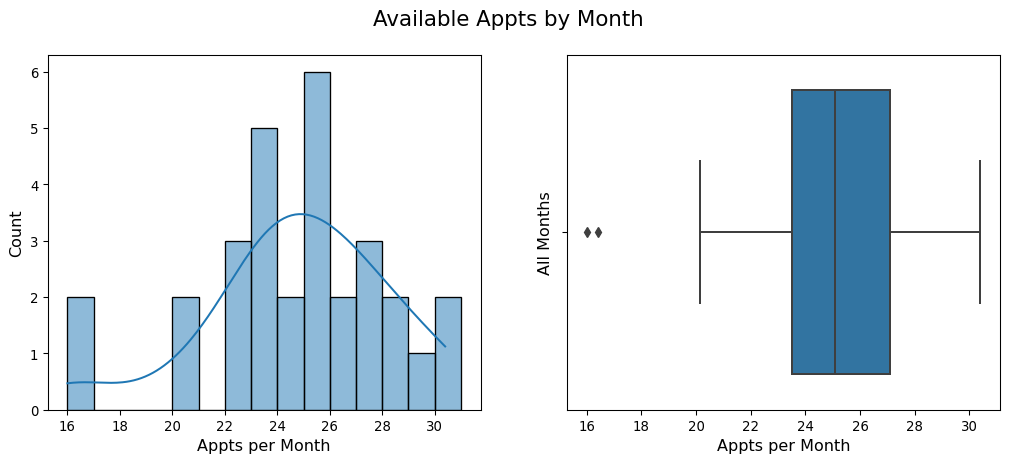

In [58]:
# Create a side by side figure.
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the charts.
sns.histplot(x = 'total_available_appts', data = utilisation, binwidth = 1,
             kde = True, ax = axs[0])

sns.boxplot(data = utilisation, x = 'total_available_appts', showfliers = True,
            ax = axs[1])

# Customize the plot.
#plt.title("Scatter Plot Title", fontsize = 16)
plt.suptitle('Available Appts by Month', fontsize = 16)
axs[0].set_xlabel('Appts per Month', fontsize = 12)
axs[0].set_ylabel('Count', fontsize = 12)

axs[1].set_xlabel('Appts per Month', fontsize = 12)
axs[1].set_ylabel('All Months', fontsize = 12)

# Display the chart.
plt.show()

#### Missed appointments

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


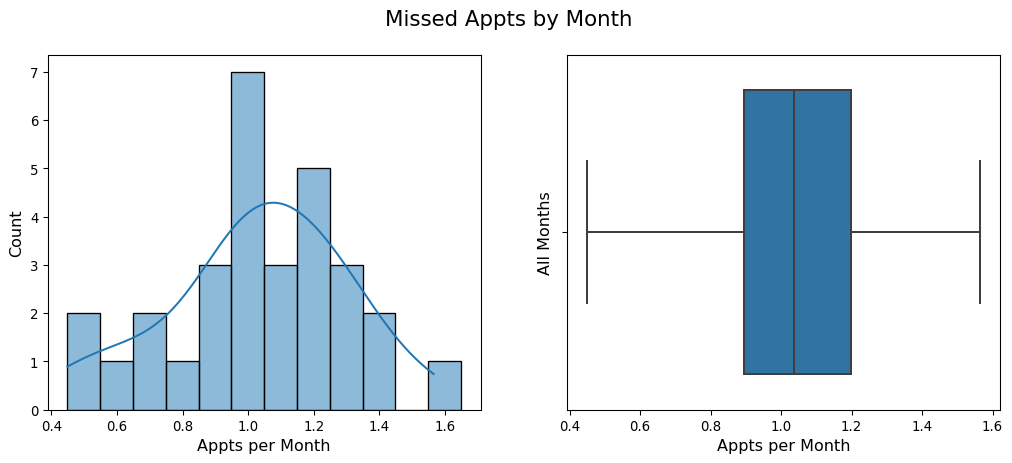

In [59]:
# Create a side by side figure.
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the charts.
sns.histplot(x = 'missed', data = utilisation, binwidth = 0.1,
             kde = True, ax = axs[0])

sns.boxplot(data = utilisation, x = 'missed', showfliers = True,
            ax = axs[1])

# Customize the plot.
#plt.title("Scatter Plot Title", fontsize = 16)
plt.suptitle('Missed Appts by Month', fontsize = 16)
axs[0].set_xlabel('Appts per Month', fontsize = 12)
axs[0].set_ylabel('Count', fontsize = 12)

axs[1].set_xlabel('Appts per Month', fontsize = 12)
axs[1].set_ylabel('All Months', fontsize = 12)

# Display the chart.
plt.show()

#### Attended appointments

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


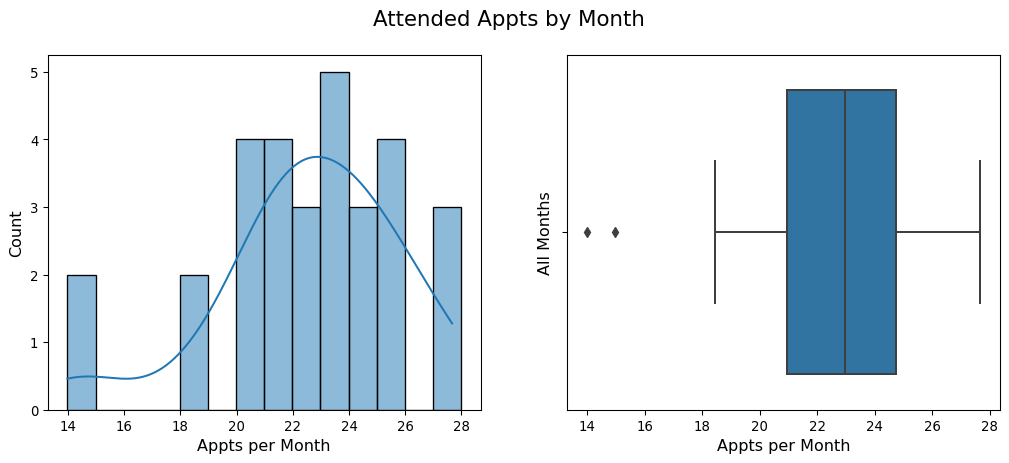

In [60]:
# Create a side by side figure.
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the charts.
sns.histplot(x = 'attended', data = utilisation, binwidth = 1,
             kde = True, ax = axs[0])

sns.boxplot(data = utilisation, x = 'attended', showfliers = True,
            ax = axs[1])

# Customize the plot.
#plt.title("Scatter Plot Title", fontsize = 16)
plt.suptitle('Attended Appts by Month', fontsize = 16)
axs[0].set_xlabel('Appts per Month', fontsize = 12)
axs[0].set_ylabel('Count', fontsize = 12)

axs[1].set_xlabel('Appts per Month', fontsize = 12)
axs[1].set_ylabel('All Months', fontsize = 12)

# Display the chart.
plt.show()

**Outliers** are present in the summarised data for two months Apr and May 2020.  These two months were impacted by the first COVID lockdown.  At this point I am **choosing to leave them in** the summarised data set as I don't believe they will havea significant impact on either utilisation or missed appointments analysis.  The source data ar also summarised but at a much lower (granular) level of detail and contains a wide spread of values.
If later on during analysis this is an issue, I may choose to change this decision.  However, I think it would be appropriate at that decision point to seek input from someone with domain expertise.

### Focus on staff and capacity

#### Visualise capacity vs available appointments vs attended appoinments

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

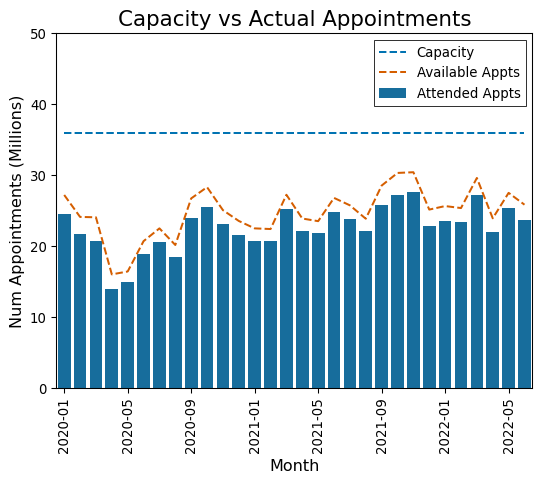

In [61]:
# Create a plot of capacity, available appts and attended appts.
# Create a plot figure and set style.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the chart - capacity, then avialable appts then attended appts.
sns.lineplot(x = 'appointment_month', y = 'capacity', data = utilisation, color = '#0173b2',
             linestyle = '--', label = 'Capacity')

sns.lineplot(x = 'appointment_month', y = 'total_available_appts', data = utilisation, color = '#d55e00',
             linestyle = '--', label = 'Available Appts')

sns.barplot(x = 'appointment_month', y = 'attended', data = utilisation,
            estimator = sum, color = '#0173b2', errorbar = None, label = 'Attended Appts')

# Customize the plot.
plt.title('Capacity vs Actual Appointments', fontsize = 16)

ax.set_xlabel('Month', fontsize = 12)
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
ax.set_ylabel('Num Appointments (Millions)', fontsize = 12)
plt.xticks(fontsize = 10, rotation = 90)

ax.set_ylim(0, 50)
ax.yaxis.set_major_locator(plt.LinearLocator(6))
plt.yticks(fontsize = 10)

leg = plt.legend(fontsize = 10, fancybox = False, loc = 'best')
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(0.75)

# Save the plot (if required).
fig.savefig('Capacity vs Actual Appointments.png')

# Display the chart.
plt.show()

#### Notes and observations:
- the number of available appointments is significanlty lower than the stated capacity
- the number of attended appointments is close to the number of available appointments

**Need to focus on number of available appointments vs capacity as this is the bigger issue**

#### Compare utilisation of capacity vs available appointments vs attended appoinments

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

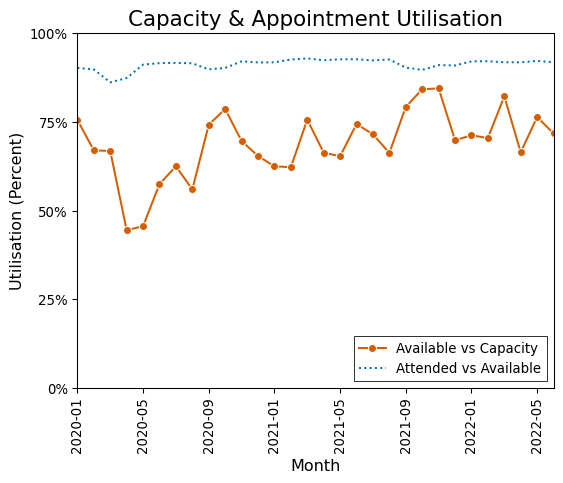

In [62]:
# Create a line plot of available vs capacity and attended vs available.
# Create a plot figure and set style.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')
'#0173b2', '#de8f05'

# Plot the charts - available vs capacity then attended vs available.
sns.lineplot(x = 'appointment_month', y = 'available_vs_capacity', data = utilisation,
             color = '#d55e00', marker = 'o', label = 'Available vs Capacity')

sns.lineplot(x = 'appointment_month', y = 'available_util', data = utilisation,
             linestyle = ':', color = '#0173b2', label = 'Attended vs Available')

# Customize the plot.
plt.title('Capacity & Appointment Utilisation', fontsize = 16)

ax.set_xlabel('Month', fontsize = 12)
ax.set_xlim('2020-01', '2022-06')
ax.xaxis.set_major_locator(plt.MaxNLocator(8))
plt.xticks(fontsize = 10, rotation = 90)

ax.set_ylabel('Utilisation (Percent)', fontsize = 12)
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(PercentFormatter())
ax.yaxis.set_major_locator(plt.LinearLocator(5))
plt.yticks(fontsize = 10)

leg = plt.legend(fontsize = 10, fancybox = False, loc = 'lower right')
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(0.75)

# Save the plot (if required).
fig.savefig('Capacity & Appointment Utilisation.png')

# Display the chart.
plt.show()

#### Notes and observations:
Utilisation confirms:
- the number of available appointments is significanlty lower than the stated capacity
- the number of attended appointments is close to the number of available appointments

**Need to focus on number of available appointments vs capacity as this is the bigger issue**

In [63]:
df1 = pd.DataFrame(data = utilisation['available_util'].describe())
df2 = pd.DataFrame(data = utilisation['available_vs_capacity'].describe())

utilisation_stats = pd.concat([df1, df2], axis = 1)
utilisation_stats.rename(columns = {'available_util': 'Attended vs Available',
                                    'available_vs_capacity': 'Available vs Capacity'},
                         inplace = True)
utilisation_stats

,Attended vs Available,Available vs Capacity
count,30.000000,30.000000
mean,91.216949,68.778197
std,1.536989,9.646571
min,86.136706,44.466336
25%,90.453795,65.320223
50%,91.763694,69.725525
75%,92.155879,75.265326
max,92.891082,84.458528


#### Notes and observations:
- use above data table to support the charts
- max appts vs capacity = 75%, min = 65% with mean = 68%
- available appointments is not close to capacity.  Why?  Is this to do with staffing levels or mix of appointment durations?
- max attended appts vs available appts = 92%, min = 86% with mean = 91%
- attendance is closer to available appointments but could be better?  Look at missed appointments.

#### Is available appts vs capacity shortfall due to mix of appointment durations or something else?

Only source of data relating to appointment duration is in dataset ad, but this only has 7 months of data.  Create subset of the data and explore appointment mix over time and over all mix.

In [64]:
# Create a subset of ad data to look at appt duration.
ad1_subset = ad1[['appointment_month', 'actual_duration', 'count_of_appointments']].copy()\
    .groupby(['appointment_month', 'actual_duration'])\
    .sum().reset_index()

# Convert appointments to millions and dates to str.
ad1_subset['count_of_appointments'] = ad1_subset['count_of_appointments'] / 1000000
ad1_subset['appointment_month'] = ad1_subset['appointment_month'].astype(str)
ad1_subset = ad1_subset.replace([np.inf, -np.inf], np.nan)

print(ad1_subset.info())
print(ad1_subset.describe())
ad1_subset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   appointment_month      49 non-null     object 
 1   actual_duration        49 non-null     object 
 2   count_of_appointments  49 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB
None
       count_of_appointments
count              49.000000
mean                3.428177
std                 1.516045
min                 1.163515
25%                 2.125583
50%                 3.537308
75%                 4.654000
max                 6.472072


,appointment_month,actual_duration,count_of_appointments
0,2021-12,1-5 Minutes,4.266686
1,2021-12,11-15 Minutes,3.280132
2,2021-12,16-20 Minutes,2.023774
3,2021-12,21-30 Minutes,1.885864
4,2021-12,31-60 Minutes,1.163515
5,2021-12,6-10 Minutes,4.654000
6,2021-12,Unknown / Data Quality,5.579512
7,2022-01,1-5 Minutes,3.975252
8,2022-01,11-15 Minutes,3.537308
9,2022-01,16-20 Minutes,2.242739


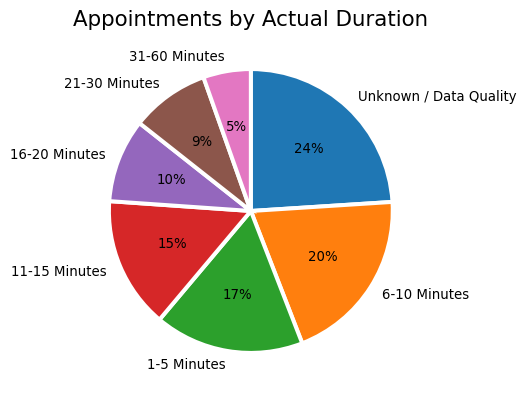

In [65]:
# Create a of appts by actual duration.
# Prepare the data.
chart_data = ad1_subset[['actual_duration', 'count_of_appointments']].copy()

chart_data = chart_data.groupby('actual_duration').sum().sort_values('count_of_appointments', ascending = False).reset_index()

# Create a plot figure.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')
sns.color_palette('colorblind')

# Plot the chart.
plt.pie(x = chart_data['count_of_appointments'], labels = chart_data['actual_duration'],
        autopct='%.0f%%', counterclock = False, startangle = 90, radius = 1,
        wedgeprops = {'edgecolor': 'white','linewidth': 3})

# Customize the plot.
plt.title('Appointments by Actual Duration', fontsize = 16)

# Save the plot (if required).
fig.savefig('Appointments by Actual Duration.png')

# Display the chart.
plt.show()

Remove Unknown / Data Quality records from ad1_subset.  This is a problem that needs addressing, 24% of appts unknown duration.

In [66]:
# Create a second ad subset without Unknown / Data Quality.
ad1_subset1_appts = ad1_subset.copy() [ad1_subset['actual_duration'] != 'Unknown / Data Quality']
ad1_subset1_appts.head()

,appointment_month,actual_duration,count_of_appointments
0,2021-12,1-5 Minutes,4.266686
1,2021-12,11-15 Minutes,3.280132
2,2021-12,16-20 Minutes,2.023774
3,2021-12,21-30 Minutes,1.885864
4,2021-12,31-60 Minutes,1.163515


Re-run pie chart

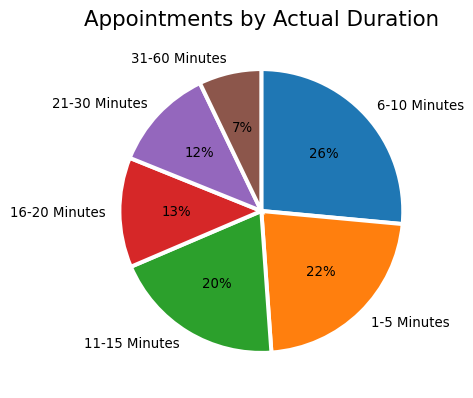

In [67]:
# Create a of appts by actual duration.
# Prepare the data.
chart_data = ad1_subset1_appts[['actual_duration', 'count_of_appointments']].copy()

chart_data = chart_data.groupby('actual_duration').sum().sort_values('count_of_appointments', ascending = False).reset_index()

# Create a plot figure.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')
sns.color_palette('colorblind')

# Plot the chart.
plt.pie(x = chart_data['count_of_appointments'], labels = chart_data['actual_duration'],
        autopct='%.0f%%', counterclock = False, startangle = 90, radius = 1,
        wedgeprops = {'edgecolor': 'white','linewidth': 3})

# Customize the plot.
plt.title('Appointments by Actual Duration', fontsize = 16)

# Save the plot (if required).
fig.savefig('Appointments by Actual Duration excl Unknowns.png')

# Display the chart.
plt.show()

Does a time series plot show anything of interest? *Not really based on below charts*

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


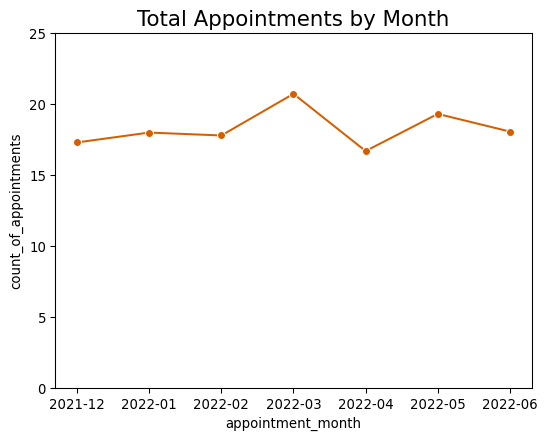

In [68]:
# Plot the total appts by month on a line chart - only 7 months of data.
# Prepare the data.
chart_data = ad1_subset1_appts[['appointment_month', 'count_of_appointments']].copy()\
    .groupby('appointment_month').sum().reset_index()

# Create a plot figure.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the chart.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = chart_data, color = '#d55e00', marker = 'o')

# Customize the plot.
plt.title('Total Appointments by Month', fontsize = 16)
ax.set_ylim(0, 25)

# Display the chart.
plt.show()

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


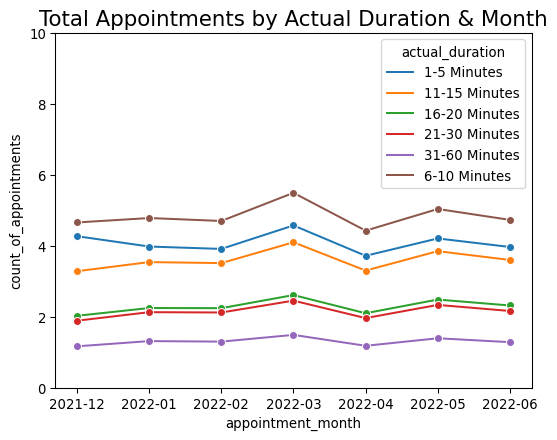

In [69]:
# Plot the total appts by month on a line chart - only 7 months of data.

# Create a plot figure.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')
sns.color_palette('colorblind')

# Plot the chart.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = ad1_subset1_appts,
             hue = 'actual_duration', marker = 'o')

# Customize the plot.
plt.title('Total Appointments by Actual Duration & Month', fontsize = 16)
ax.set_ylim(0, 10)

# Display the chart.
plt.show()

#### Investigate if number of appts is converted to amount of time, what does that show?

Create a revised data set of ad that shows total amount of time by apptointment duration.  Anticipate long appoints are low in number, but high in the amount of time consumed.  One way to increase capacity would be to limit the length of appts.

In [70]:
# Start with appts subset.
ad1_subset1_appts.columns

Index(['appointment_month', 'actual_duration', 'count_of_appointments'], dtype='object')

In [71]:
# Pivot ad1 subset 1 to get rows into columns for appointment status.
ad1_subset1_appts_pvt = ad1_subset1_appts.pivot(index = 'appointment_month', columns = 'actual_duration',
                                   values = 'count_of_appointments').reset_index()

ad1_subset1_appts_pvt['appointment_month'] = ad1_subset1_appts_pvt['appointment_month'].astype(str)

ad1_subset1_appts_pvt

actual_duration,appointment_month,1-5 Minutes,11-15 Minutes,16-20 Minutes,21-30 Minutes,31-60 Minutes,6-10 Minutes
0,2021-12,4.266686,3.280132,2.023774,1.885864,1.163515,4.654000
1,2022-01,3.975252,3.537308,2.242739,2.125583,1.310454,4.778719
2,2022-02,3.908364,3.508227,2.238822,2.116476,1.295696,4.695914
3,2022-03,4.570114,4.095290,2.607518,2.450292,1.485532,5.489184
4,2022-04,3.714437,3.297961,2.095851,1.958618,1.177878,4.422913
5,2022-05,4.203478,3.845162,2.481613,2.330326,1.390177,5.033645
6,2022-06,3.962534,3.596802,2.313930,2.159206,1.280180,4.726440


In [72]:
# Calculate total timee for each column num appts (Ms) *  mins / 60 in M hrs.
# Assume appts take the max time in the range.
ad1_subset1_appts_pvt['1-5 Minutes'] = (ad1_subset1_appts_pvt['1-5 Minutes'] * 5) / 60
ad1_subset1_appts_pvt['11-15 Minutes'] = (ad1_subset1_appts_pvt['11-15 Minutes'] * 15) / 60
ad1_subset1_appts_pvt['16-20 Minutes'] = (ad1_subset1_appts_pvt['16-20 Minutes'] * 20) / 60
ad1_subset1_appts_pvt['21-30 Minutes'] = (ad1_subset1_appts_pvt['21-30 Minutes'] * 30) / 60
ad1_subset1_appts_pvt['31-60 Minutes'] = (ad1_subset1_appts_pvt['31-60 Minutes'] * 60) / 60
ad1_subset1_appts_pvt['6-10 Minutes'] = (ad1_subset1_appts_pvt['6-10 Minutes'] * 10) / 60

ad1_subset1_appts_pvt

actual_duration,appointment_month,1-5 Minutes,11-15 Minutes,16-20 Minutes,21-30 Minutes,31-60 Minutes,6-10 Minutes
0,2021-12,0.355557,0.820033,0.674591,0.942932,1.163515,0.775667
1,2022-01,0.331271,0.884327,0.747580,1.062791,1.310454,0.796453
2,2022-02,0.325697,0.877057,0.746274,1.058238,1.295696,0.782652
3,2022-03,0.380843,1.023823,0.869173,1.225146,1.485532,0.914864
4,2022-04,0.309536,0.824490,0.698617,0.979309,1.177878,0.737152
5,2022-05,0.350290,0.961291,0.827204,1.165163,1.390177,0.838941
6,2022-06,0.330211,0.899200,0.771310,1.079603,1.280180,0.787740


In [73]:
# Re-shape the data and change value column name.
ad1_subset1_hrs = ad1_subset1_appts_pvt.melt(id_vars = ['appointment_month'],
                                      value_vars = ['1-5 Minutes', '11-15 Minutes',
                                                    '16-20 Minutes', '21-30 Minutes',
                                                    '31-60 Minutes', '6-10 Minutes'])

ad1_subset1_hrs.rename(columns = {'value': 'hours_Ms'}, inplace = True)

ad1_subset1_hrs.head()

,appointment_month,actual_duration,hours_Ms
0,2021-12,1-5 Minutes,0.355557
1,2022-01,1-5 Minutes,0.331271
2,2022-02,1-5 Minutes,0.325697
3,2022-03,1-5 Minutes,0.380843
4,2022-04,1-5 Minutes,0.309536


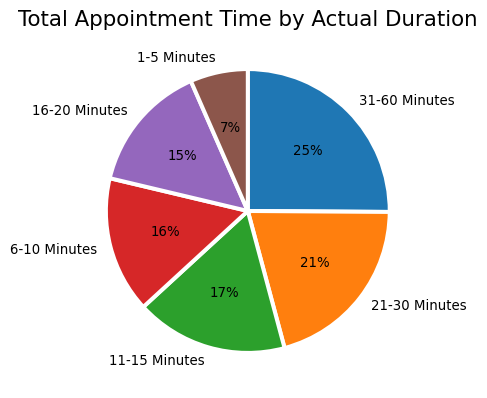

In [74]:
# Create a pie chart of time by actual duration.
# Prepare the data.
chart_data = ad1_subset1_hrs[['actual_duration', 'hours_Ms']].copy()

chart_data = chart_data.groupby('actual_duration').sum().sort_values('hours_Ms', ascending = False).reset_index()

# Create a plot figure.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')
sns.color_palette('colorblind')

# Plot the chart.
plt.pie(x = chart_data['hours_Ms'], labels = chart_data['actual_duration'],
        autopct='%.0f%%', counterclock = False, startangle = 90, radius = 1,
        wedgeprops = {'edgecolor': 'white','linewidth': 3})

# Customize the plot.
plt.title('Total Appointment Time by Actual Duration', fontsize = 16)

# Save the plot (if required).
fig.savefig('Total Appointment Time by Actual Duration.png')

# Display the chart.
plt.show()

This suggests limiting appointment times on longer appointments would create additional (more) capacity for shorter appointments.

Does a time series plot show anything of interest? *Not really based on below charts*

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


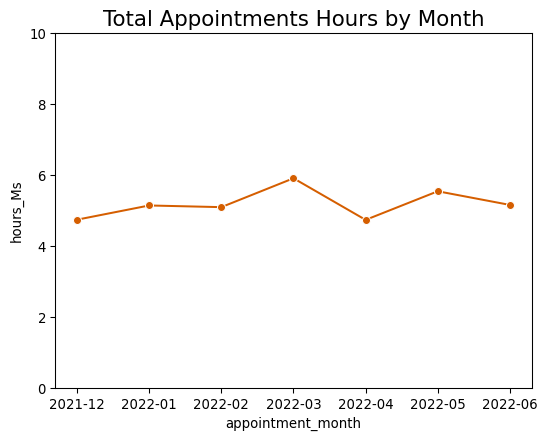

In [75]:
# Plot the total hours by month on a line chart - only 7 months of data.
# Prepare the data.
chart_data = ad1_subset1_hrs[['appointment_month', 'hours_Ms']].copy()\
    .groupby('appointment_month').sum().reset_index()

# Create a plot figure.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the chart.
sns.lineplot(x = 'appointment_month', y = 'hours_Ms', data = chart_data, color = '#d55e00', marker = 'o')

# Customize the plot.
plt.title('Total Appointments Hours by Month', fontsize = 16)
ax.set_ylim(0, 10)

# Display the chart.
plt.show()

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


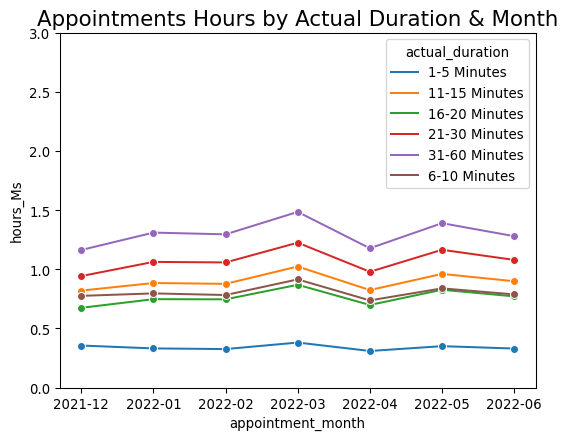

In [76]:
# Plot the total hours by month on a line chart - only 7 months of data.

# Create a plot figure.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')
sns.color_palette('colorblind')

# Plot the chart.
sns.lineplot(x = 'appointment_month', y = 'hours_Ms', data = ad1_subset1_hrs,
             hue = 'actual_duration', marker = 'o')

# Customize the plot.
plt.title('Appointments Hours by Actual Duration & Month', fontsize = 16)
ax.set_ylim(0, 3)

# Display the chart.
plt.show()

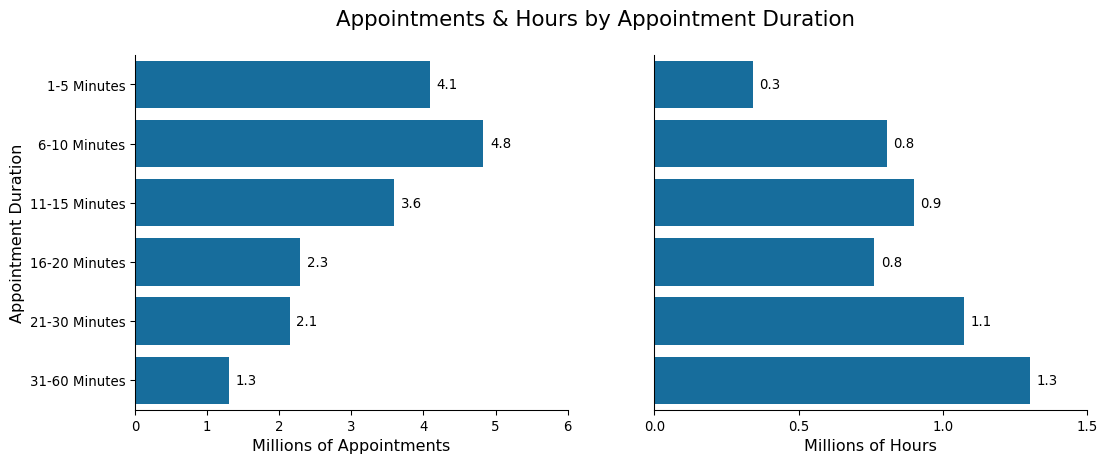

In [77]:
# Create a side by side chart of total appts and total hours per month by appt duration.
# Prepare the appts data and convert to a monthly value (note there are 7 months of data in the data set.
chart_data_appts = ad1_subset1_appts[['actual_duration', 'count_of_appointments']].copy()\
    .groupby('actual_duration').sum().reset_index()

chart_data_appts['count_of_appointments'] = chart_data_appts['count_of_appointments'] / 7

# Prepare the hours data and convert to a monthly value (note there are 7 months of data in the data set.
chart_data_hrs = ad1_subset1_hrs[['actual_duration', 'hours_Ms']].copy()\
    .groupby('actual_duration').sum().reset_index()

chart_data_hrs['hours_Ms'] = chart_data_hrs['hours_Ms'] / 7

# Set the same display order for both charts.
display_order = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes',
                 '21-30 Minutes', '31-60 Minutes'] 

# Create a side by side figure.
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12.8, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the charts.
sns.barplot(x = 'count_of_appointments', y = 'actual_duration', data = chart_data_appts,
            estimator = sum, order = display_order, color = '#0173b2',
            errorbar = None, ax = axs[0])

sns.barplot(x = 'hours_Ms', y = 'actual_duration', data = chart_data_hrs,
            estimator = sum, order = display_order, color = '#0173b2',
            errorbar = None, ax = axs[1])

# Customize the plot.
plt.suptitle('Appointments & Hours by Appointment Duration', fontsize = 16)
plt.yticks(fontsize = 10)

# Customize the LH plot.
axs[0].spines[['top', 'right']].set_visible(False)
axs[0].set_ylabel('Appointment Duration', fontsize = 12)
axs[0].set_xlabel('Millions of Appointments', fontsize = 12)
axs[0].set_xlim(0, 6)
axs[0].xaxis.set_major_locator(plt.LinearLocator(7))
axs[0].bar_label(axs[0].containers[0], fmt = '{:,.1f}', padding = 5)

# Customize the RH plot.
axs[1].spines[['top', 'right']].set_visible(False)
axs[1].get_yaxis().set_visible(False)
axs[1].set_xlabel('Millions of Hours', fontsize = 12)
axs[1].set_xlim(0, 1.5)
axs[1].xaxis.set_major_locator(plt.LinearLocator(4))
axs[1].bar_label(axs[1].containers[0], fmt = '{:,.1f}', padding = 5)

# Save the plot (if required).
fig.savefig('Appointments & Hours by Actual Duration.png')

# Display the chart.
plt.show()

This shows the impact of 21-30 and 31-60 mins on capacity - 19% of appts consume 46% of the available time.

**CONCLUSION:** 
- available appointments are not at stated capacity levels
- where appointments are available, they are ['reasonably'] well attended
- more appointments could be created if the number of longer apointments were reduced
- further maths required to project the impact this would have, but assumption is that it would not meet capacity so more staff would need to be added (to be validated)

### Focus on missed GP appointments

#### Appointments by Appointment Status

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


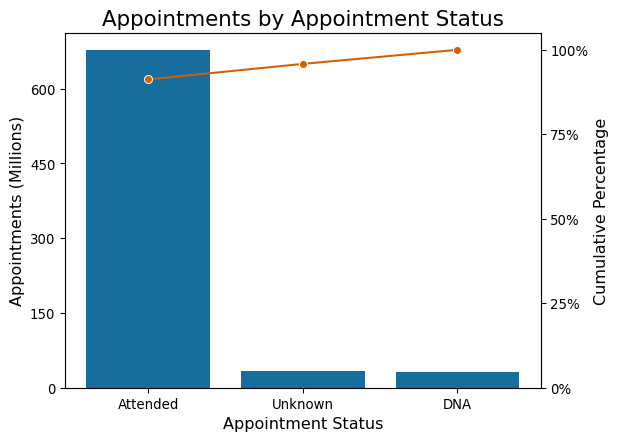

In [78]:
# Create a PARETO CHART of appointments by appointment status.
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter

# Prepare the data.
chart_data = ar[['appointment_status', 'count_of_appointments']].copy()
chart_data['count_of_appointments'] = chart_data['count_of_appointments'] / 1000000    # Convert to Millions.
chart_data = chart_data.groupby('appointment_status').sum().reset_index().sort_values('count_of_appointments', ascending = False)

# Add column to display cumulative percentage.
chart_data['cumperc'] = chart_data['count_of_appointments'].cumsum()/chart_data['count_of_appointments'].sum()*100

# Create a plot figure.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')
sns.color_palette('colorblind')

# Plot the chart.
ax = sns.barplot(x = 'appointment_status', y = 'count_of_appointments', data = chart_data,
            estimator = sum, color = '#0173b2', errorbar = None)

# Create cumulative percentage line against secondary y axis.
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'appointment_status', y = 'cumperc', data = chart_data, marker = 'o', color = '#d55e00')

# Customize the plot.
plt.title('Appointments by Appointment Status', fontsize = 16)

ax.set_xlabel('Appointment Status', fontsize = 12)
ax.set_ylabel('Appointments (Millions)', fontsize = 12)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2.set_ylabel('Cumulative Percentage', fontsize = 12)
ax2.set_ylim(0, 105)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Save the plot (if required).
fig.savefig('Missed Appointments Pareto 1.png')

# Display the chart.
plt.show()

Missed appointments (DNA) account for 4% of total appointments with andother 4.5% having unknown status.

#### Missed appointments by Health Care Professional

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


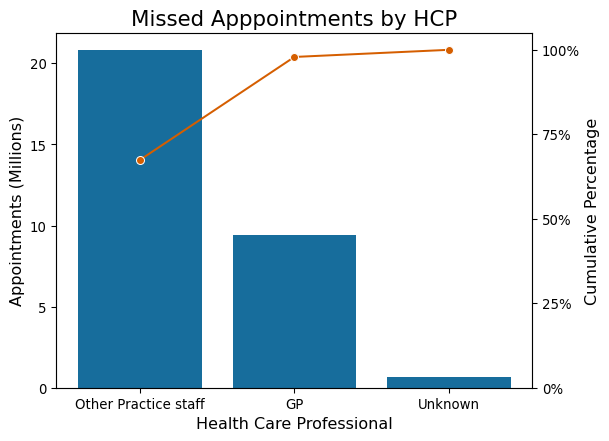

In [79]:
# Create a PARETO CHART of missed appointments by hcp type.
import matplotlib as mpl
from matplotlib.ticker import PercentFormatter

# Prepare the data.
chart_data = missed[['hcp_type', 'count_of_appointments']].copy()
chart_data['count_of_appointments'] = chart_data['count_of_appointments'] / 1000000    # Convert to Millions.
chart_data = chart_data.groupby('hcp_type').sum().reset_index().sort_values('count_of_appointments', ascending = False)

# Add column to display cumulative percentage.
chart_data['cumperc'] = chart_data['count_of_appointments'].cumsum()/chart_data['count_of_appointments'].sum()*100

# Create a plot figure.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')
sns.color_palette('colorblind')

# Plot the chart.
ax = sns.barplot(x = 'hcp_type', y = 'count_of_appointments', data = chart_data,
            estimator = sum, color = '#0173b2', errorbar = None)

# Create cumulative percentage line against secondary y axis.
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'hcp_type', y = 'cumperc', data = chart_data, marker = 'o', color = '#d55e00')

# Customize the plot.
plt.title('Missed Apppointments by HCP', fontsize = 16)

ax.set_xlabel('Health Care Professional', fontsize = 12)
ax.set_ylabel('Appointments (Millions)', fontsize = 12)
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2.set_ylabel('Cumulative Percentage', fontsize = 12)
ax2.set_ylim(0, 105)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(PercentFormatter())

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Save the plot (if required).
fig.savefig('Missed Appointments Pareto 2.png')

# Display the chart.
plt.show()

Of those 4% Missed appointments, 30% are GP related but 65% are Other Practice Staff.  This suggests missed GP appointments are the problem but Other Practice Staff are. 

#### View Total Available Appointments over time

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


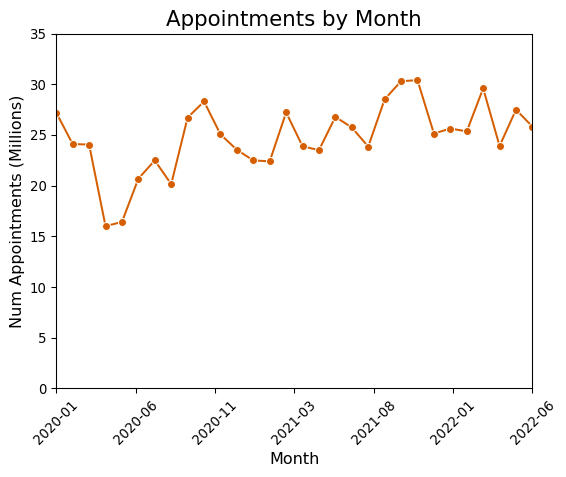

In [80]:
# Create a line plot of total available appointments.
# Create a plot figure and set style.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the chart.
sns.lineplot(x = 'appointment_month', y = 'total_available_appts', data = utilisation,
                  marker = 'o', color = '#d55e00')

# Customize the plot.
plt.title('Appointments by Month', fontsize = 16)

ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Num Appointments (Millions)', fontsize = 12)
ax.set_ylim(0, 35)
ax.xaxis.set_major_locator(plt.LinearLocator(8))

ax.set_xlim('2020-01', '2022-06')
ax.xaxis.set_major_locator(plt.LinearLocator(7))

plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)




# Save the plot (if required).
fig.savefig('Appointments by Month.png')

# Display the chart.
plt.show()

Number of appointments per month is increasing over time

#### View Missed (DNA) Appointments over time

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


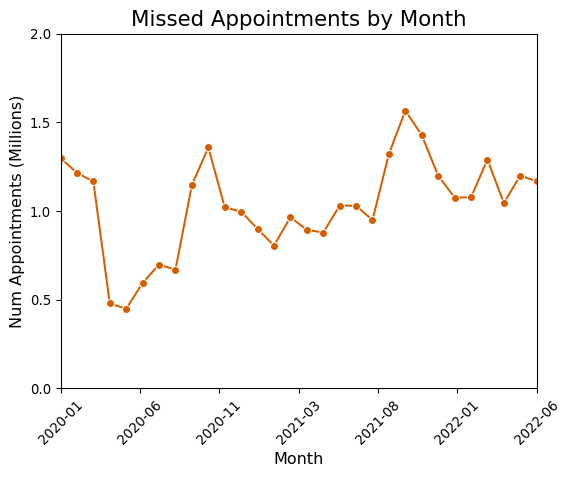

In [81]:
# Create a line plot of missed appointments.
# Create a plot figure and set style.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the chart.
sns.lineplot(x = 'appointment_month', y = 'missed', data = utilisation,
                  marker = 'o', color = '#d55e00')

# Customize the plot.
plt.title('Missed Appointments by Month', fontsize = 16)

ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Num Appointments (Millions)', fontsize = 12)

ax.set_ylim(0, 2)
ax.yaxis.set_major_locator(plt.LinearLocator(5))

ax.set_xlim('2020-01', '2022-06')
ax.xaxis.set_major_locator(plt.LinearLocator(7))

plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)

# Save the plot (if required).
fig.savefig('Missed Appointments by Month.png')

# Display the chart.
plt.show()

Number of missed appointments per month is increasing over time

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


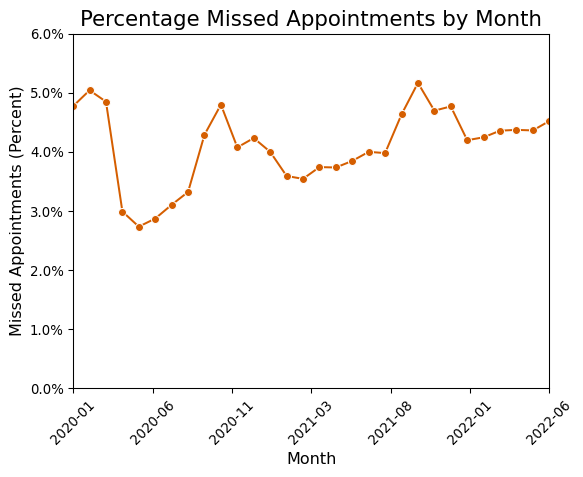

In [82]:
# Create a line plot of missed appointments.
# Prepare the data.
chart_data = utilisation[['appointment_month', 'missed', 'total_available_appts']].copy()
chart_data['pct_missed_appts'] = (chart_data['missed'] / chart_data['total_available_appts']) * 100

# Create a plot figure and set style.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the chart.
sns.lineplot(x = 'appointment_month', y = 'pct_missed_appts', data = chart_data,
                  marker = 'o', color = '#d55e00')

# Customize the plot.
plt.title('Percentage Missed Appointments by Month', fontsize = 16)

ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Missed Appointments (Percent)', fontsize = 12)


ax.set_xlim('2020-01', '2022-06')
ax.xaxis.set_major_locator(plt.LinearLocator(7))

ax.set_ylim(0, 6)
ax.yaxis.set_major_formatter(PercentFormatter())

plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)

# Save the plot (if required).
fig.savefig('Percentage Missed Apointments by Month.png')

# Display the chart.
plt.show()

Most importantly ... the percentage of appointments missed is increasing over time.  This needs to be understood and addressed.

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


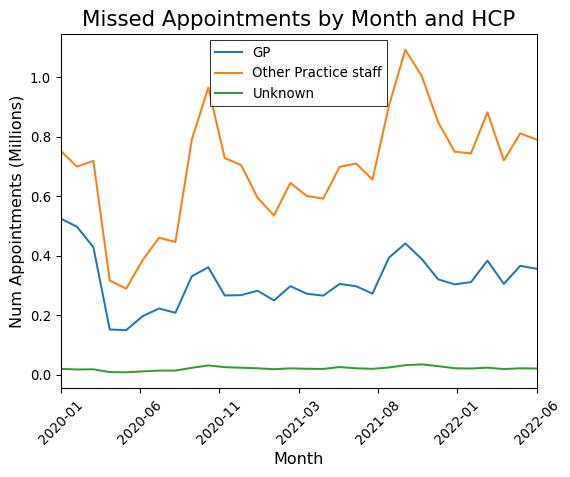

In [83]:
# Create a line plot of total available appointments.
# Prepare the data.
chart_data = missed[['appointment_month', 'hcp_type', 'count_of_appointments']].copy()\
    .groupby(['appointment_month', 'hcp_type']).sum()\
    .reset_index()

# Change units to millions, date to string.
chart_data['count_of_appointments'] = chart_data['count_of_appointments'] / 1000000
chart_data['appointment_month'] = chart_data['appointment_month'].astype(str)

# Create a plot figure and set style.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')
sns.color_palette('colorblind')

# Plot the chart.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = chart_data, hue = 'hcp_type')

# Customize the plot.
plt.title('Missed Appointments by Month and HCP', fontsize = 16)

ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Num Appointments (Millions)', fontsize = 12)


ax.set_xlim('2020-01', '2022-06')
ax.xaxis.set_major_locator(plt.LinearLocator(7))

plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)

leg = plt.legend(fontsize = 10, fancybox = False, loc = 'best')
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(0.75)


# Save the plot (if required).
#fig.savefig('abc.png')

# Display the chart.
plt.show()

Remove unknown as it has minimal impact

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


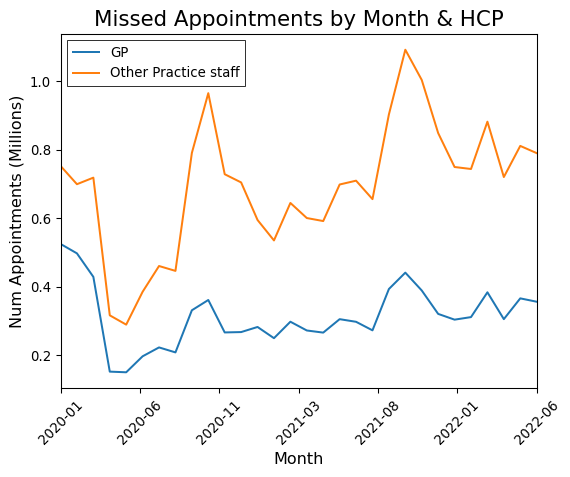

In [84]:
# Create a line plot of total available appointments.
# Prepare the data.
chart_data = missed[['appointment_month', 'hcp_type', 'count_of_appointments']].copy()\
    .groupby(['appointment_month', 'hcp_type']).sum()\
    .reset_index()

# Change units to millions, date to string.
chart_data['count_of_appointments'] = chart_data['count_of_appointments'] / 1000000
chart_data['appointment_month'] = chart_data['appointment_month'].astype(str)

chart_data = chart_data [chart_data['hcp_type'] != 'Unknown']

# Create a plot figure and set style.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')
sns.color_palette('colorblind')

# Plot the chart.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = chart_data, hue = 'hcp_type')

# Customize the plot.
plt.title('Missed Appointments by Month & HCP', fontsize = 16)

ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Num Appointments (Millions)', fontsize = 12)


ax.set_xlim('2020-01', '2022-06')
ax.xaxis.set_major_locator(plt.LinearLocator(7))

plt.xticks(fontsize = 10, rotation = 45)
plt.yticks(fontsize = 10)

leg = plt.legend(fontsize = 10, fancybox = False, loc = 'best')
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(0.75)


# Save the plot (if required).
fig.savefig('Missed Appointments by Month & HCP.png')

# Display the chart.
plt.show()

Number of missed appointments per month is increasing over time and the major contributor to this growth is Other Practice Staff.  Missed GP appointments appears not to be changing significantly.
Need to project impact of growing missed appointments.

#### Plotting the trend of missed appts as percentage of available appointments

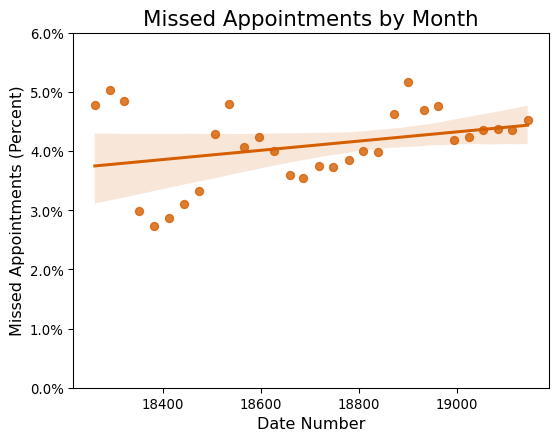

In [85]:
# Create a regression plot of missed appts as % of available appts.
import matplotlib.dates as mdates
# Prepare the data.
chart_data = utilisation[['appointment_month', 'missed', 'total_available_appts']].copy()
chart_data['pct_missed_appts'] = (chart_data['missed'] / chart_data['total_available_appts']) * 100

chart_data['month_as_number'] = mdates.date2num(utilisation['appointment_month'])

# Create a plot figure and set style.
fig, ax = plt.subplots()
fig.set_size_inches(6.4, 4.8)
fig.set_dpi(96)
plt.style.use('default')

# Plot the chart.
sns.regplot(x = 'month_as_number', y = 'pct_missed_appts', data = chart_data, color = '#d55e00')

# Customize the plot.
plt.title('Missed Appointments by Month', fontsize = 16)

ax.set_xlabel('Date Number', fontsize = 12)
ax.set_ylabel('Missed Appointments (Percent)', fontsize = 12)

ax.set_ylim(0, 6)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
ax.yaxis.set_major_formatter(PercentFormatter())
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

# Save the plot (if required).
fig.savefig('Missed Appointments Trend.png')

# Display the chart.
plt.show()

This chart is suggesting that trend line for missed appointments has grown from 3.8% to 4.3% over 36 months.  In the scheme of things this isn't the biggest issue for the NHS so should be treated as a secondary issue.

### Additional request - tweet data

Does the available tweet data provide any additional insight?

In [86]:
# Import python libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the maximum column width of the DataFrame to 200.
pd.options.display.max_colwidth=200

In [87]:
# Import tweets data into new dataframe.
tweets = pd.read_csv('tweets.csv')
print(tweets.info())
tweets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


Extract the full tweet text from the data frome for analysis.

In [88]:
# Create new data frame for tweet text.
tweets_text = pd.DataFrame(data = tweets['tweet_full_text'])

print(tweets_text.info())
tweets_text.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_full_text  1174 non-null   object
dtypes: object(1)
memory usage: 9.3+ KB
None


,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [89]:
# Convert object to string to enable searching.
tweets_text['tweet_full_text'] = tweets_text['tweet_full_text'].astype('str')

In [90]:
# Search for refereneces to the NHS
tweets_text[tweets_text['tweet_full_text'].str.contains("NHS", case=False, na=False)]

,tweet_full_text
200,RT @LaunchpadDevon: @RDCareersNHS Recruitment Event Exeter – Saturday 17 September\n\nThis event is for anyone interested in roles availabl…
231,RT @SkillsLaunchpad: Recruitment Event Exeter – Saturday 17 September with @RDCareersNHS \n\nFor anyone interested in #administration #heal…
450,HLA Scholar Thessa Rebecca Frieble from our Amsterdam cohort tells us what leadership means to her.\n\nhttps://t.co/Wt4ZmQ3H3z\n\n#HLAScholars #Leadership #HLA #Healthcare #NHS #doctor #Medical #S...


The tweet data provided only referenced the NHS on 3 occassions, noe of which were relevent to the overall use case.  Recommend further investigation into tweet data as this may provide context and / or insight into public perception and experiences of the NHS, including providing early warnings of potential issues (leading indicator).

# SECTION 2: Weekly Assignment Activities

## Week 1

### Background & Objectives

The NHS needs more capacity to support an increasing population.  Some stakeholders believe capacity should be added through investment others believe resources should be better utilised.<br><br>
The NHS needs to understand current utilisation and trends within its’ network to make the right decision(s).  The NHS believes missed GP appointments contribute to lower utilisation.  To determine if this is true, utilisation of current resources needs to be understood and two questions have been posed:
- Has there been adequate staff and capacity in the networks?
- What was the actual utilisation of resources?<br>

Null hypotheses:
- Missed GP appointments do not cause resource utilisation to be low.
- There is adequate staff and capacity in the network.
?


### Analytical Approach

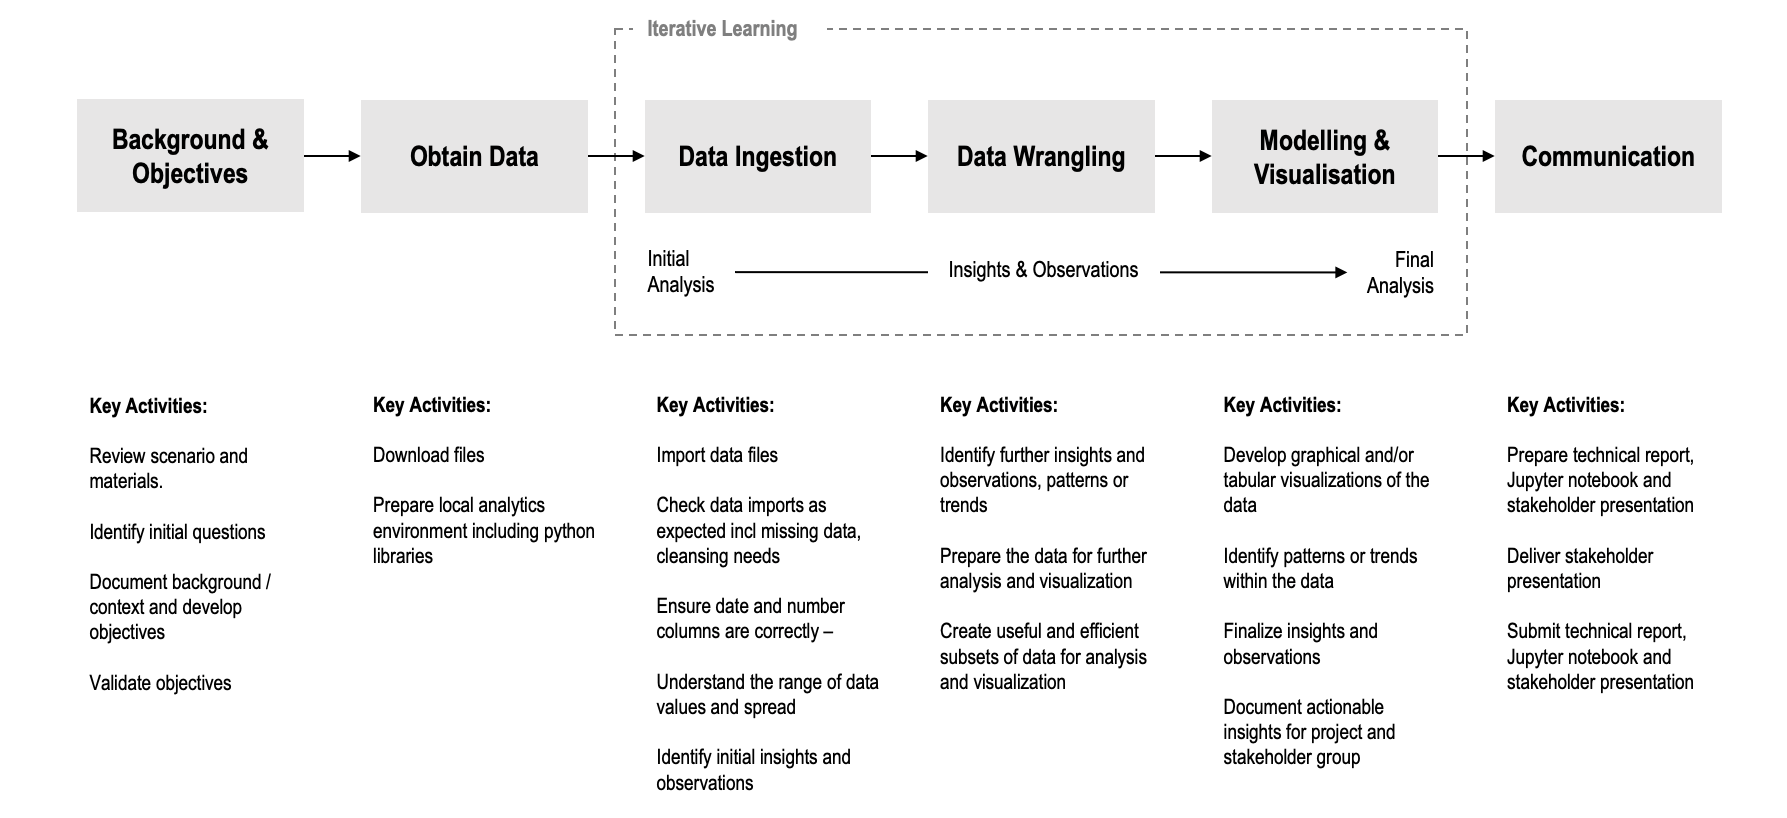

### Key questions to be answered
1. What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?
2. What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?
3. What is the number of appointments and records per month?
4. What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?
5. What are the top trending hashtags (#) on the supplied Twitter data set and how can this be used in the decision-making process?
6. Was there adequate staff and capacity in the networks?
7. What was the actual utilisation of resources?
8. What insights can be gained by looking at missed appointments?
9. What are the most important patterns visible in the data relating to the use case? 
10. What insights can be gained from the data, and what recommendations can be made to the NHS based on these insights?
### Assumptions
1. Data cleansing is not required (to be validated).  According to the Meta Data, "the data set (CSV files) were cleaned for you".

## Week 2

### Q1. How many locations are there in the data set?
 There are 106 unique locations:

In [91]:
# View column information.
ad['sub_icb_location_name'].describe()

count                                137793
unique                                  106
top       NHS Norfolk and Waveney ICB - 26A
freq                                   1484
Name: sub_icb_location_name, dtype: object

### Q2. What are the five locations with the highest number of appointments?

In [92]:
# Create a subset of of data with sum of appointments, grouped by location.
nc_loc_appts = pd.DataFrame(nc, columns = ['sub_icb_location_name', 'count_of_appointments']).\
    groupby('sub_icb_location_name').agg('sum')

# Sort the lists by sum of appointments descending and show the top five.
nc_loc_appts.sort_values(by=['count_of_appointments'], ascending = False).head(5)

,count_of_appointments
sub_icb_location_name,
NHS North West London ICB - W2U3Z,12142390.0
NHS North East London ICB - A3A8R,9588891.0
NHS Kent and Medway ICB - 91Q,9286167.0
NHS Hampshire and Isle Of Wight ICB - D9Y0V,8288102.0
NHS South East London ICB - 72Q,7850170.0


### Q3. How many service settings, context types, national categories, and appointment statuses are there?
#### There are 5 service settings:

In [93]:
# View column information.
nc['service_setting'].describe()

count               817394
unique                   5
top       General Practice
freq                359274
Name: service_setting, dtype: object

In [94]:
# View unique values.
print(nc['service_setting'].unique())

['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']


#### There are 3 context types:

In [95]:
# View column information.
nc['context_type'].describe()

count                     817394
unique                         3
top       Care Related Encounter
freq                      700481
Name: context_type, dtype: object

In [96]:
# View unique values.
print(nc['context_type'].unique())

['Care Related Encounter' 'Unmapped' 'Inconsistent Mapping']


#### There are 18 national categories:

In [97]:
# View column information.
nc['national_category'].describe()

count                   817394
unique                      18
top       Inconsistent Mapping
freq                     89494
Name: national_category, dtype: object

In [98]:
# View unique values.
print(nc['national_category'].unique())

['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in']


#### There are 3 appointment statuses:

In [99]:
# View column information.
ar['appointment_status'].describe()

count       596821
unique           3
top       Attended
freq        232137
Name: appointment_status, dtype: object

In [100]:
# View unique values.
print(ar['appointment_status'].unique())

['Attended' 'DNA' 'Unknown']


### Q4. Are there any comments regarding data quality or descriptive statistics worth noting for each of the data sets?

#### Actual Duration:
- Columns = 8, Rows = 137,793
- No missing values
- 'count_of_appointments' will need to be converted from 'int' to 'float'
- 'appointment_date' will need to be converted from 'object' to 'datetime'
- There are 106 values values for 'sub_icb_location_code', 'sub_icb_location_ons_code' and 'sub_icb_location_name'. This suggests they represent the same "thing"
- 'count_of_appointments': 137,793 records, appears to contain outliers, not nornally distributed
- Total number of appts = 167,980,692<br>

#### Appointments Regional:
- Columns = 7, Rows = 596,821
- No missing values
- 'count_of_appointments' will need to be converted from 'int' to 'float'
- 'appointment_month' will need to be converted from 'object' to 'datetime'
- 'count_of_appointments': 596,821 records, appears to contain outliers, not nornally distributed
- Total number of appts = 742,804,525<br>

#### National Categories:
- Columns = 8, Rows = 817,394
- No missing values
- 'count_of_appointments' will need to be converted from 'int' to 'float'
- 'appointment_month' will need to be converted from 'object' to 'datetime'
- 'count_of_appointments': 817,394 records, not normally distributed, contains outliers
- Total number of appts = 296,046,770

### General:
- Raw number format is difficult to read in '1234567' format, would be easier with comma separators ie '1,234,567'.

### Q5. Can you comment on other features (columns) that could potentially be useful in your analysis?

#### Missed Appointments:
The data in ar['appointment_status'] will be useful for analysis of "missed" appointments.  Additionally, the data could be segmented using other categorical and location data:
- are more appointments missed in specific months than others?
- is there a relationship between time from booking to actual appointment and missed appointments?
- is there are relatinship between missed appointments and appointment mode or healtchcare professional?
- do some ICB's have higher levels of missed appointments than others?

#### Appointment Dates & Months:
- ‘appointment_month’ is in ‘ar’ and ‘nc’ but not it 'ad'.  It could be derived for ‘ad’ from ‘appointment_date’ to enable consistent and efficient analysis of time periods.

#### Data Merging:
- Is there an opportunity to merge the three data sets together or just nc and ar?  Full data sets or just overlapping dates?
- Would there be a benefit in doing this in terms of relationships, correlations, cause and effect?
- ‘icb_ons_code’ is common to all three data sets and could be used as a potential key for joining the data.
- ‘appointment_month’ is in ‘ar’ and ‘nc’ and could be derived for ‘ad’ from ‘appointment_date’ making a potential second join key

#### Utilisation:
Unclear at this stage how to measure this in terms of what the planned capacity is.  Could demonstrated capacity be calculated and used?

#### Staffing Levels:
Unsure how to determine this until understanding utlisation question.

## Week 3

### Q1. Between what dates were appointments scheduled?

In [101]:
# Check the min and max appointment_dates for ad and nc.
print("AD appointment dates min = ", ad['appointment_date'].min(), "and max =",
      ad['appointment_date'].max())
print("NC appointment dates min = ", nc['appointment_date'].min(), "and max =",
      nc['appointment_date'].max())

print()

# Check the min and max appointment_months for ar and nc.
print("AR appointment month min = ", ar['appointment_month'].min(), "and max =",
      ar['appointment_month'].max())
print("NC appointment month min = ", nc['appointment_month'].min(), "and max =",
      nc['appointment_month'].max())
print("AD appointment month min = ", ad['appointment_month'].min(), "and max =",
      ad['appointment_month'].max())

AD appointment dates min =  2021-12-01 00:00:00 and max = 2022-06-30 00:00:00
NC appointment dates min =  2021-08-01 00:00:00 and max = 2022-06-30 00:00:00

AR appointment month min =  2020-01 and max = 2022-06
NC appointment month min =  2021-08 and max = 2022-06
AD appointment month min =  2021-12 and max = 2022-06


### Q2. Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?
The 'General Practice' service setting reported the most appointments in North West London from 1 January to 1 June 2022 with 4,760,966 appts.

In [102]:
# Look for exact string for North West London.
nc['sub_icb_location_name'].unique()       # Not the most efficient way!

# Which is 'NHS North West London ICB - W2U3Z'.

array(['NHS North East and North Cumbria ICB - 00L',
       'NHS North East and North Cumbria ICB - 00N',
       'NHS North East and North Cumbria ICB - 00P',
       'NHS Lancashire and South Cumbria ICB - 00Q',
       'NHS Lancashire and South Cumbria ICB - 00R',
       'NHS Greater Manchester ICB - 00T',
       'NHS Greater Manchester ICB - 00V',
       'NHS Lancashire and South Cumbria ICB - 00X',
       'NHS Greater Manchester ICB - 00Y',
       'NHS Lancashire and South Cumbria ICB - 01A',
       'NHS Greater Manchester ICB - 01D',
       'NHS Lancashire and South Cumbria ICB - 01E',
       'NHS Cheshire and Merseyside ICB - 01F',
       'NHS Greater Manchester ICB - 01G',
       'NHS North East and North Cumbria ICB - 01H',
       'NHS Cheshire and Merseyside ICB - 01J',
       'NHS Lancashire and South Cumbria ICB - 01K',
       'NHS Cheshire and Merseyside ICB - 01T',
       'NHS Cheshire and Merseyside ICB - 01V',
       'NHS Greater Manchester ICB - 01W',
       'NHS Cheshire

In [103]:
# Create a subset of data for North West London location.
nc_subset1 = pd.DataFrame(nc, columns = ['sub_icb_location_name', 'service_setting', 
                                        'count_of_appointments', 'appointment_date']) [nc['sub_icb_location_name'] ==
                                        'NHS North West London ICB - W2U3Z']
# View the data.
nc_subset1

,sub_icb_location_name,service_setting,count_of_appointments,appointment_date
794321,NHS North West London ICB - W2U3Z,Unmapped,607.0,2021-08-01
794322,NHS North West London ICB - W2U3Z,Other,6.0,2021-08-01
794323,NHS North West London ICB - W2U3Z,General Practice,47.0,2021-08-01
794324,NHS North West London ICB - W2U3Z,General Practice,74.0,2021-08-01
794325,NHS North West London ICB - W2U3Z,General Practice,98.0,2021-08-01
...,...,...,...,...
807323,NHS North West London ICB - W2U3Z,Extended Access Provision,6.0,2022-06-30
807324,NHS North West London ICB - W2U3Z,Extended Access Provision,25.0,2022-06-30
807325,NHS North West London ICB - W2U3Z,Extended Access Provision,217.0,2022-06-30
807326,NHS North West London ICB - W2U3Z,Extended Access Provision,103.0,2022-06-30


In [104]:
# Check only records for North West London location have pulled through into subset.
nc_subset1['sub_icb_location_name'].value_counts()

sub_icb_location_name
NHS North West London ICB - W2U3Z    13007
Name: count, dtype: int64

In [105]:
# Further subset the data to only include records within the desired date range.
nc_subset2 = pd.DataFrame(nc_subset1) [(nc_subset1['appointment_date'] >= '2022-01-01') &
                                       (nc_subset1['appointment_date'] < '2022-06-01')]
nc_subset2

,sub_icb_location_name,service_setting,count_of_appointments,appointment_date
800289,NHS North West London ICB - W2U3Z,Unmapped,496.0,2022-01-01
800290,NHS North West London ICB - W2U3Z,Primary Care Network,19.0,2022-01-01
800291,NHS North West London ICB - W2U3Z,Other,1.0,2022-01-01
800292,NHS North West London ICB - W2U3Z,General Practice,16.0,2022-01-01
800293,NHS North West London ICB - W2U3Z,Primary Care Network,29.0,2022-01-01
...,...,...,...,...
806173,NHS North West London ICB - W2U3Z,General Practice,10092.0,2022-05-31
806174,NHS North West London ICB - W2U3Z,General Practice,2541.0,2022-05-31
806175,NHS North West London ICB - W2U3Z,General Practice,20.0,2022-05-31
806176,NHS North West London ICB - W2U3Z,General Practice,11.0,2022-05-31


In [106]:
# Check only min and max dates are as expected.
print("Minimum date is", nc_subset2['appointment_date'].min())
print("Maximum date is", nc_subset2['appointment_date'].max())

Minimum date is 2022-01-01 00:00:00
Maximum date is 2022-05-31 00:00:00


In [107]:
# Determine which service setting had the most appointments.
nc_subset2.groupby('service_setting')[['count_of_appointments']].sum().sort_values('count_of_appointments',
                                                                                         ascending = False)

,count_of_appointments
service_setting,
General Practice,4760966.0
Unmapped,387939.0
Other,151616.0
Primary Care Network,108901.0
Extended Access Provision,97409.0


### Q3. Which month had the highest number of appointments?
Nov 2021 had the highest number of monthly appointments with 30,405,070:

In [108]:
# Which months have the most appointments? --> MY WAY
# Create subset of ar data.
appts_by_month = pd.DataFrame(data = nc[['appointment_month', 'count_of_appointments']])

# Display grouped result in descending order.
appts_by_month.groupby('appointment_month').sum().sort_values('count_of_appointments',
                                                              ascending = False).head(5)

,count_of_appointments
appointment_month,
2021-11,30405070.0
2021-10,30303834.0
2022-03,29595038.0
2021-09,28522501.0
2022-05,27495508.0


In [109]:
# Which months have the most appointments? --> SUGGESTED WAY
# Create subset of ar data.
appts_by_month2 = pd.DataFrame(data = nc[['appointment_date', 'count_of_appointments']])
appts_by_month2.groupby([appts_by_month2['appointment_date'].dt.year,
                         appts_by_month2['appointment_date'].dt.month]) [['count_of_appointments']].sum().\
sort_values('count_of_appointments', ascending = False)

count_of_appointments
appointment_date appointment_date                       
2021             11                           30405070.0
                 10                           30303834.0
2022             3                            29595038.0
2021             9                            28522501.0
2022             5                            27495508.0
                 6                            25828078.0
                 1                            25635474.0
                 2                            25355260.0
2021             12                           25140776.0
2022             4                            23913060.0
2021             8                            23852171.0

### Q4. What was the total number of appointments per month per data source?

In [110]:
# Which months have the most appointments?
ad_by_month = pd.DataFrame(data = ad[['appointment_month', 'count_of_appointments']])
ad_by_month.groupby('appointment_month').sum()

,count_of_appointments
appointment_month,
2021-12,22853483.0
2022-01,23597196.0
2022-02,23351939.0
2022-03,27170002.0
2022-04,21948814.0
2022-05,25343941.0
2022-06,23715317.0


In [111]:
# Which months have the most appointments?
ar_by_month = pd.DataFrame(data = ar[['appointment_month', 'count_of_appointments']])
ar_by_month.groupby('appointment_month').sum()

,count_of_appointments
appointment_month,
2020-01,27199296.0
2020-02,24104621.0
2020-03,24053468.0
2020-04,16007881.0
2020-05,16417212.0
2020-06,20690805.0
2020-07,22491437.0
2020-08,20150520.0
2020-09,26714255.0


In [112]:
# Which months have the most appointments?
nc_by_month = pd.DataFrame(data = nc[['appointment_month', 'count_of_appointments']])
nc_by_month.groupby('appointment_month').sum()

,count_of_appointments
appointment_month,
2021-08,23852171.0
2021-09,28522501.0
2021-10,30303834.0
2021-11,30405070.0
2021-12,25140776.0
2022-01,25635474.0
2022-02,25355260.0
2022-03,29595038.0
2022-04,23913060.0


## Week 4

### Objective 1: Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories

#### Service Setting

In [113]:
# Create a subset of the nc data.
nc_ss = pd.DataFrame(data = nc[['appointment_month', 'service_setting', 'count_of_appointments']])

nc_ss['appointment_month'] = nc_ss['appointment_month'].astype(str)

appts_time_series = nc_ss\
    .groupby([nc_ss['appointment_month'],nc_ss['service_setting']]) [['count_of_appointments']]\
    .sum()\
    .reset_index()\
    .copy()

appts_time_series

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927.0
1,2021-08,General Practice,21575852.0
2,2021-08,Other,449101.0
3,2021-08,Primary Care Network,432448.0
4,2021-08,Unmapped,1233843.0
5,2021-09,Extended Access Provision,187906.0
6,2021-09,General Practice,25940821.0
7,2021-09,Other,527174.0
8,2021-09,Primary Care Network,530485.0
9,2021-09,Unmapped,1336115.0


In [114]:
appts_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   appointment_month      55 non-null     object 
 1   service_setting        55 non-null     object 
 2   count_of_appointments  55 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


In [115]:
appts_time_series.isnull

<bound method DataFrame.isnull of    appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision               160927.0
1            2021-08           General Practice             21575852.0
2            2021-08                      Other               449101.0
3            2021-08       Primary Care Network               432448.0
4            2021-08                   Unmapped              1233843.0
5            2021-09  Extended Access Provision               187906.0
6            2021-09           General Practice             25940821.0
7            2021-09                      Other               527174.0
8            2021-09       Primary Care Network               530485.0
9            2021-09                   Unmapped              1336115.0
10           2021-10  Extended Access Provision               209539.0
11           2021-10           General Practice             27606171.0
12           2021-10                      O

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


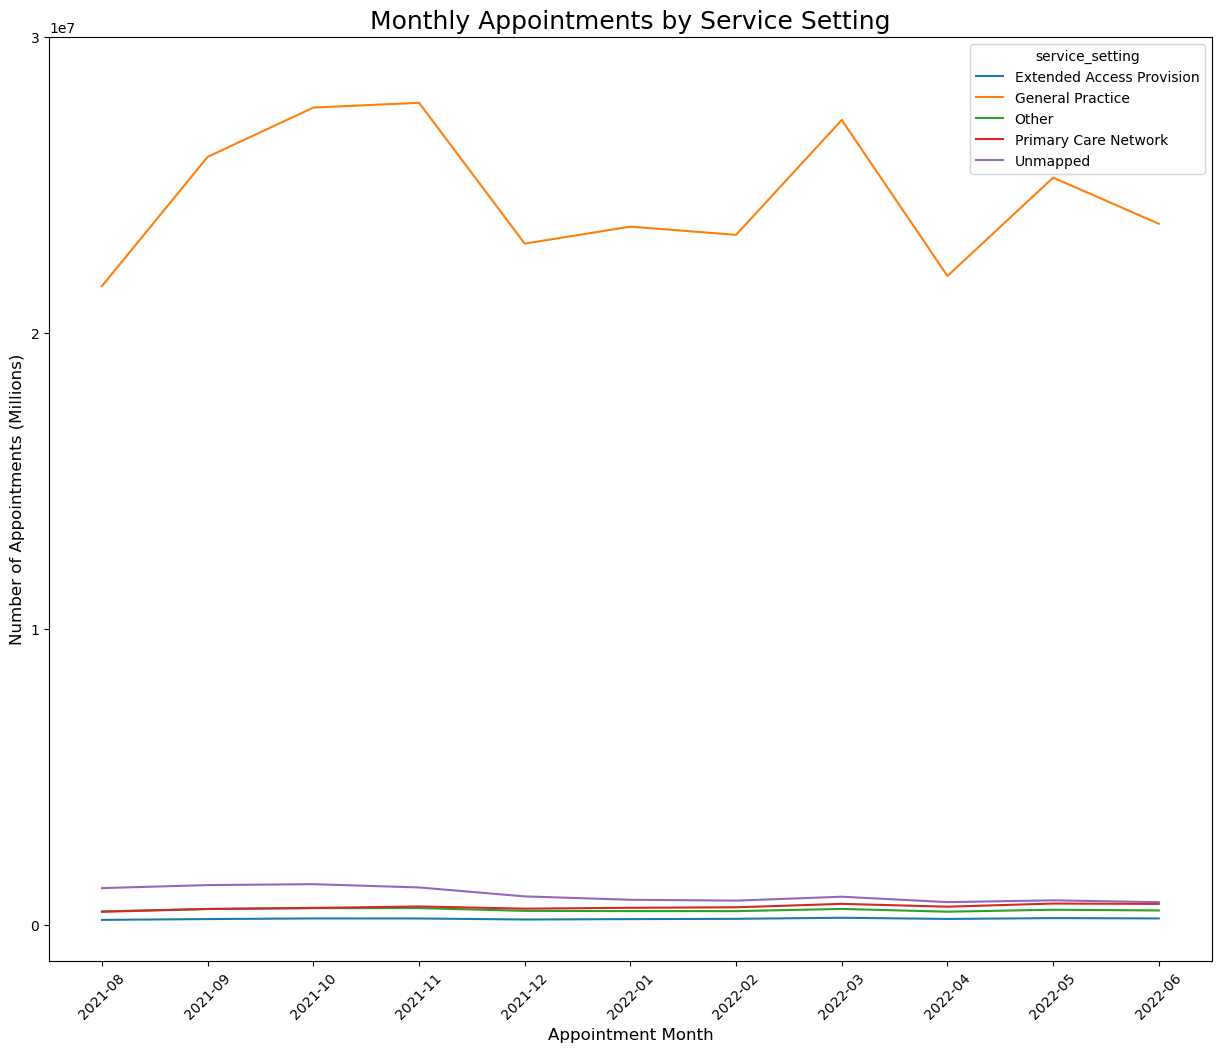

In [116]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

# Create multiple lineplot by service setting.
sns.lineplot(x = ('appointment_month'), y = 'count_of_appointments', data = appts_time_series,
             hue = 'service_setting', errorbar = None)\
    .set_title("Monthly Appointments by Service Setting", fontsize = 18)

ax.set_xlabel("Appointment Month", fontsize = 12)
ax.set_ylabel("Number of Appointments (Millions)", fontsize = 12)

# Add ticks to y-axis.
ax.set_yticks([0, 10000000, 20000000, 30000000])

ax.tick_params(axis='x', labelrotation = 45)


#plt.legend() 
plt.show()

#### Context Type

In [117]:
# Create a subset of the nc data.
nc_ct = pd.DataFrame(data = nc[['appointment_month', 'context_type', 'count_of_appointments']])

nc_ct['appointment_month'] = nc_ct['appointment_month'].astype(str)

appts_time_series = nc_ct\
    .groupby([nc_ct['appointment_month'],nc_ct['context_type']]) [['count_of_appointments']]\
    .sum()\
    .reset_index()\
    .copy()

appts_time_series

,appointment_month,context_type,count_of_appointments
0,2021-08,Care Related Encounter,20255235.0
1,2021-08,Inconsistent Mapping,2363093.0
2,2021-08,Unmapped,1233843.0
3,2021-09,Care Related Encounter,24404251.0
4,2021-09,Inconsistent Mapping,2782135.0
5,2021-09,Unmapped,1336115.0
6,2021-10,Care Related Encounter,26125201.0
7,2021-10,Inconsistent Mapping,2811977.0
8,2021-10,Unmapped,1366656.0
9,2021-11,Care Related Encounter,26282778.0


/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


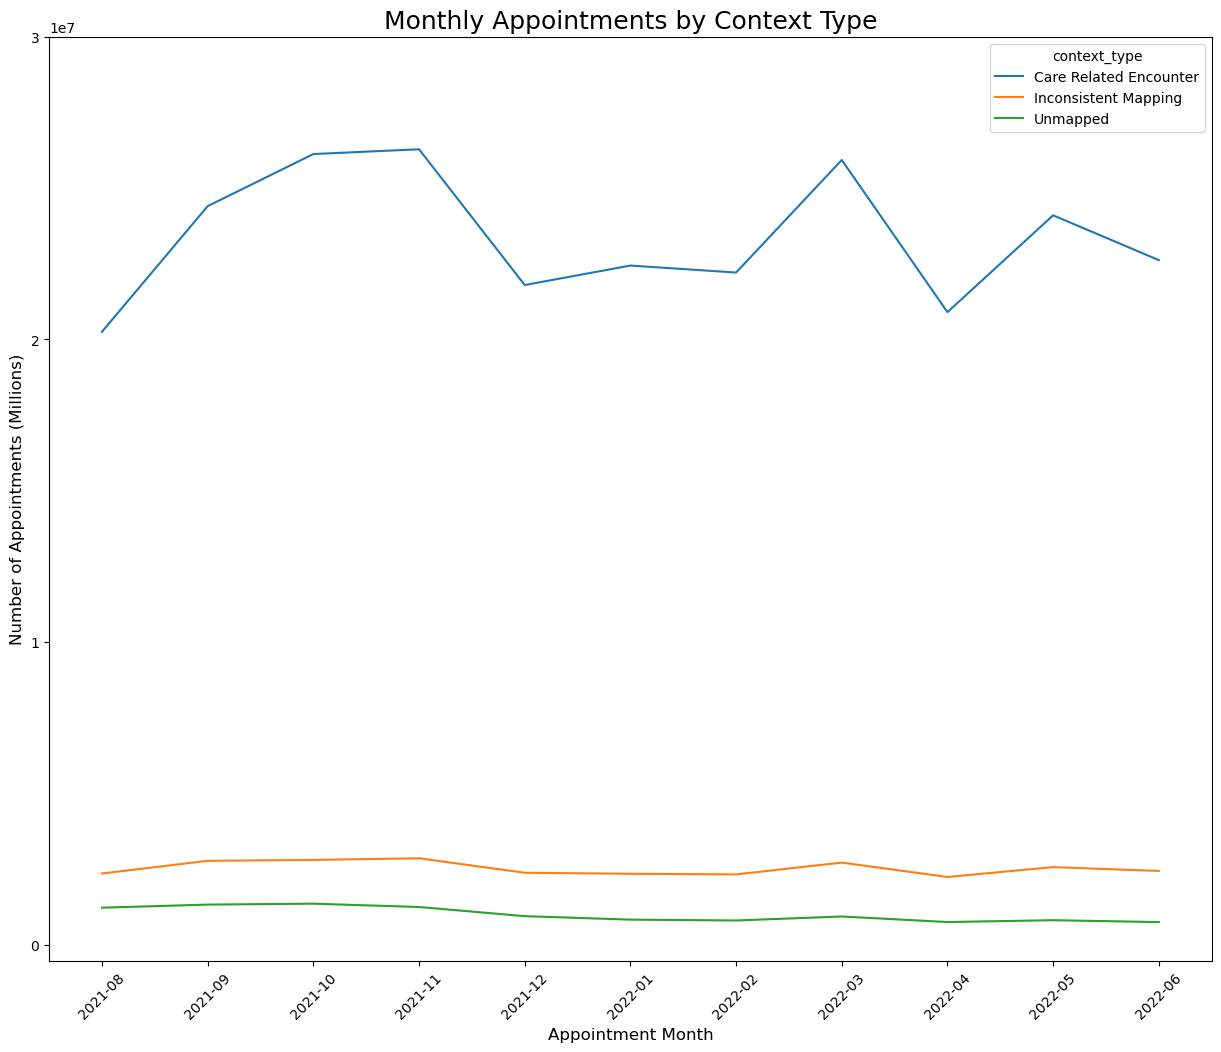

In [118]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

# Create multiple lineplot by service setting.
sns.lineplot(x = ('appointment_month'), y = 'count_of_appointments', data = appts_time_series,
             hue = 'context_type', errorbar = None)\
    .set_title("Monthly Appointments by Context Type", fontsize = 18)

ax.set_xlabel("Appointment Month", fontsize = 12)
ax.set_ylabel("Number of Appointments (Millions)", fontsize = 12)

# Add ticks to y-axis.
ax.set_yticks([0, 10000000, 20000000, 30000000])

ax.tick_params(axis='x', labelrotation = 45)


#plt.legend() 
plt.show()

#### National Category

In [119]:
# Create a subset of the nc data.
nc_nc = pd.DataFrame(data = nc[['appointment_month', 'national_category', 'count_of_appointments']])

nc_nc['appointment_month'] = nc_nc['appointment_month'].astype(str)

appts_time_series = nc_ct\
    .groupby([nc_nc['appointment_month'],nc_nc['national_category']]) [['count_of_appointments']]\
    .sum()\
    .reset_index()\
    .copy()

appts_time_series

,appointment_month,national_category,count_of_appointments
0,2021-08,Care Home Needs Assessment & Personalised Care and Support Planning,29676.0
1,2021-08,Care Home Visit,47583.0
2,2021-08,Clinical Triage,3704207.0
3,2021-08,General Consultation Acute,4280920.0
4,2021-08,General Consultation Routine,7756045.0
...,...,...,...
193,2022-06,Social Prescribing Service,55066.0
194,2022-06,Structured Medication Review,187800.0
195,2022-06,Unmapped,758640.0
196,2022-06,Unplanned Clinical Activity,274491.0


/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


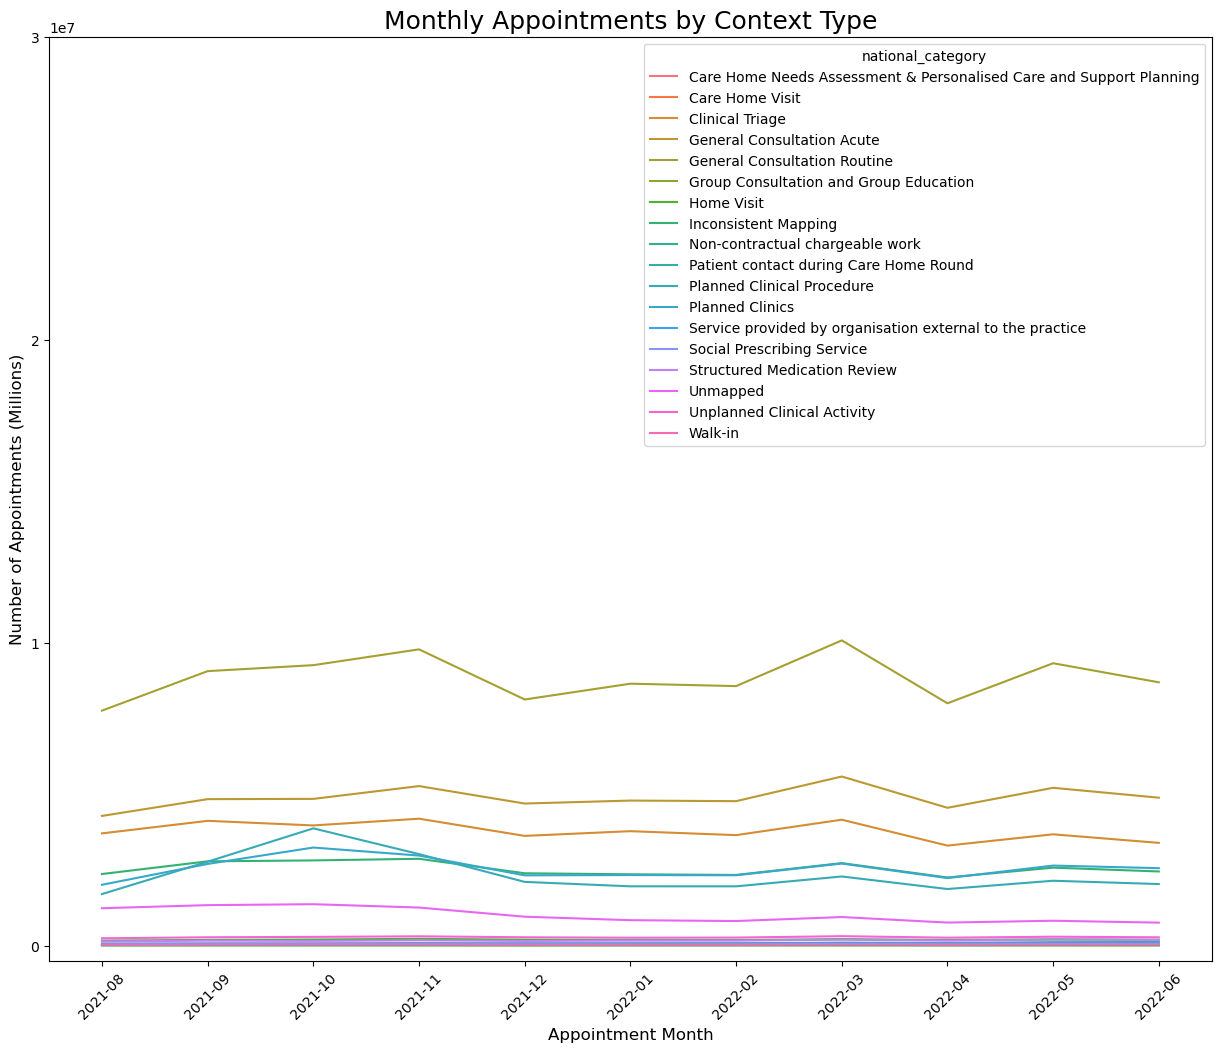

In [120]:
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

# Create multiple lineplot by service setting.
sns.lineplot(x = ('appointment_month'), y = 'count_of_appointments', data = appts_time_series,
             hue = 'national_category', errorbar = None)\
    .set_title("Monthly Appointments by Context Type", fontsize = 18)

ax.set_xlabel("Appointment Month", fontsize = 12)
ax.set_ylabel("Number of Appointments (Millions)", fontsize = 12)

# Add ticks to y-axis.
ax.set_yticks([0, 10000000, 20000000, 30000000])

ax.tick_params(axis='x', labelrotation = 45)


#plt.legend() 
plt.show()

### Objective 2: Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

In [121]:
# Split the data into subsets by season.

nc_summer = pd.DataFrame(nc) [(nc['appointment_month'] > '2021-05') & (nc['appointment_month'] < '2021-09')]
nc_summer['season'] = 'Summer'
print("Summer", nc_summer.sample(n = 5))

nc_autumn = pd.DataFrame(nc) [(nc['appointment_month'] > '2021-08') & (nc['appointment_month'] < '2021-12')]
nc_autumn['season'] = 'Autumn'
print("Autum", nc_autumn.sample(n = 5))

nc_winter = pd.DataFrame(nc) [(nc['appointment_month'] > '2021-11') & (nc['appointment_month'] < '2022-03')]
nc_winter['season'] = 'Winter'
print("Winter", nc_winter.sample(n = 5))

nc_spring = pd.DataFrame(nc) [(nc['appointment_month'] > '2022-02') & (nc['appointment_month'] < '2022-06')]
nc_spring['season'] = 'Spring'
print("Spring", nc_spring.sample(n = 5))

frames = [nc_summer, nc_autumn, nc_winter, nc_spring]
nc_seasons = pd.concat(frames)
nc_seasons.sample(n = 10)

Summer        appointment_date icb_ons_code  \
95527        2021-08-31    E54000008   
575175       2021-08-19    E54000051   
307874       2021-08-05    E54000023   
545811       2021-08-02    E54000008   
333247       2021-08-24    E54000023   

                             sub_icb_location_name            service_setting  \
95527        NHS Cheshire and Merseyside ICB - 01V  Extended Access Provision   
575175    NHS Humber and North Yorkshire ICB - 42D           General Practice   
307874  NHS Suffolk and North East Essex ICB - 06L           General Practice   
545811       NHS Cheshire and Merseyside ICB - 27D           General Practice   
333247  NHS Suffolk and North East Essex ICB - 06T                      Other   

                  context_type             national_category  \
95527   Care Related Encounter    General Consultation Acute   
575175  Care Related Encounter               Care Home Visit   
307874  Care Related Encounter                    Home Visit   
545811  C

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,season
615502,2021-12-24,E54000030,NHS South East London ICB - 72Q,Primary Care Network,Care Related Encounter,General Consultation Routine,50.0,2021-12,Winter
473983,2021-10-12,E54000055,NHS Birmingham and Solihull ICB - 15E,Primary Care Network,Inconsistent Mapping,Inconsistent Mapping,124.0,2021-10,Autumn
675829,2021-12-21,E54000028,NHS North Central London ICB - 93C,General Practice,Care Related Encounter,Clinical Triage,3858.0,2021-12,Winter
147373,2021-10-25,E54000061,NHS South Yorkshire ICB - 02P,Other,Inconsistent Mapping,Inconsistent Mapping,10.0,2021-10,Autumn
811931,2022-01-05,E54000054,NHS West Yorkshire ICB - X2C4Y,Primary Care Network,Care Related Encounter,Care Home Visit,1.0,2022-01,Winter
300797,2021-09-27,E54000025,NHS Hertfordshire and West Essex ICB - 06K,Other,Care Related Encounter,Care Home Visit,4.0,2021-09,Autumn
499540,2022-03-08,E54000058,NHS Derby and Derbyshire ICB - 15M,Primary Care Network,Inconsistent Mapping,Inconsistent Mapping,20.0,2022-03,Spring
728861,2022-02-06,E54000029,NHS North East London ICB - A3A8R,Primary Care Network,Care Related Encounter,Structured Medication Review,7.0,2022-02,Winter
216487,2022-03-15,E54000051,NHS Humber and North Yorkshire ICB - 03Q,General Practice,Care Related Encounter,Walk-in,1.0,2022-03,Spring
279510,2022-01-18,E54000010,NHS Staffordshire and Stoke-on-Trent ICB - 05V,Primary Care Network,Care Related Encounter,General Consultation Acute,4.0,2022-01,Winter


#### Summer

Text(0, 0.5, 'Number of Appointments (Millions)')

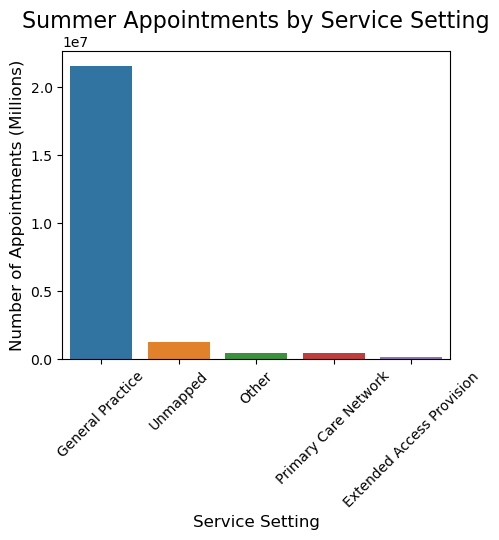

In [122]:
# Create a barplot for summer.
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)

plot_order = nc_summer.groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending=False).index.values

sns.barplot(x='service_setting', y='count_of_appointments', estimator=sum, data=nc_summer,
            errorbar = None, order = plot_order).set_title("Summer Appointments by Service Setting",
                                                           fontsize = 16)

ax.tick_params(axis='x', labelrotation = 45)

ax.set_xlabel("Service Setting", fontsize = 12)
ax.set_ylabel("Number of Appointments (Millions)", fontsize = 12)



#### Autumn

Text(0, 0.5, 'Number of Appointments (Millions)')

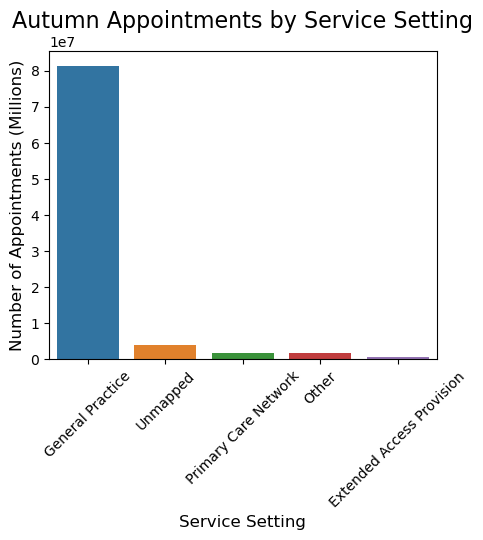

In [123]:
# Create a barplot for autumn.
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)

plot_order = nc_autumn.groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending=False).index.values

sns.barplot(x = 'service_setting', y = 'count_of_appointments', estimator = sum, data = nc_autumn,
            errorbar = None, order = plot_order).set_title("Autumn Appointments by Service Setting",
                                                           fontsize = 16)

ax.tick_params(axis='x', labelrotation = 45)

ax.set_xlabel("Service Setting", fontsize = 12)
ax.set_ylabel("Number of Appointments (Millions)", fontsize = 12)



#### Winter

Text(0, 0.5, 'Number of Appointments (Millions)')

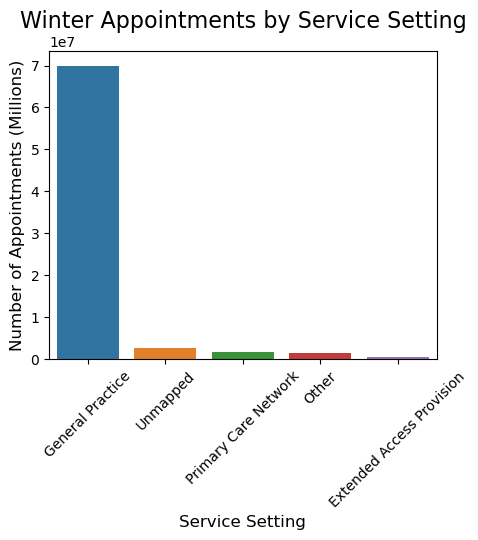

In [124]:
# Create a barplot for winter.
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)

plot_order = nc_winter.groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending=False).index.values

sns.barplot(x = 'service_setting', y = 'count_of_appointments', estimator = sum, data = nc_winter,
            errorbar = None, order = plot_order).set_title("Winter Appointments by Service Setting",
                                                           fontsize = 16)

ax.tick_params(axis='x', labelrotation = 45)

ax.set_xlabel("Service Setting", fontsize = 12)
ax.set_ylabel("Number of Appointments (Millions)", fontsize = 12)



#### Spring

Text(0, 0.5, 'Number of Appointments (Millions)')

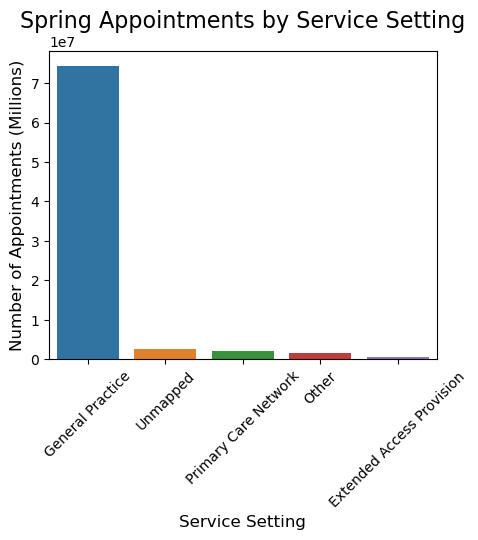

In [125]:
# Create a barplot for summer.
# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(5, 4)

plot_order = nc_spring.groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending=False).index.values

sns.barplot(x='service_setting', y='count_of_appointments', estimator=sum, data=nc_spring,
            errorbar = None, order = plot_order).set_title("Spring Appointments by Service Setting",
                                                           fontsize = 16)

ax.tick_params(axis='x', labelrotation = 45)

ax.set_xlabel("Service Setting", fontsize = 12)
ax.set_ylabel("Number of Appointments (Millions)", fontsize = 12)



<Axes: xlabel='service_setting', ylabel='count_of_appointments'>

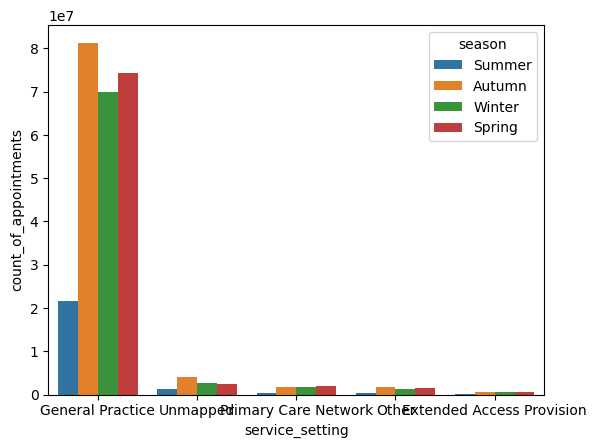

In [126]:
# Create a grouped barplot.

plot_order = nc_seasons.groupby('service_setting')['count_of_appointments'].sum()\
    .sort_values(ascending=False).index.values

sns.barplot(x='service_setting', y='count_of_appointments', hue='season', estimator=sum,
            data=nc_seasons, errorbar = None, order = plot_order)

In [127]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype    
---  ------                             --------------   -----    
 0   icb_ons_code                       596821 non-null  object   
 1   appointment_month                  596821 non-null  period[M]
 2   appointment_status                 596821 non-null  object   
 3   hcp_type                           596821 non-null  object   
 4   appointment_mode                   596821 non-null  object   
 5   time_between_book_and_appointment  596821 non-null  object   
 6   count_of_appointments              596821 non-null  float64  
dtypes: float64(1), object(5), period[M](1)
memory usage: 31.9+ MB


In [128]:
ar['appointment_status'].value_counts()

appointment_status
Attended    232137
Unknown     201324
DNA         163360
Name: count, dtype: int64

In [129]:
# Create a new dataframe for missed appointments only.
missed = pd.DataFrame(data = ar) [(ar['appointment_status'] == 'DNA')]
missed

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
69,E54000034,2020-01,DNA,GP,Face-to-Face,1 Day,430.0
70,E54000034,2020-01,DNA,GP,Face-to-Face,15 to 21 Days,452.0
71,E54000034,2020-01,DNA,GP,Face-to-Face,2 to 7 Days,1249.0
72,E54000034,2020-01,DNA,GP,Face-to-Face,22 to 28 Days,276.0
73,E54000034,2020-01,DNA,GP,Face-to-Face,8 to 14 Days,797.0
...,...,...,...,...,...,...,...
596756,E54000050,2022-06,DNA,Unknown,Unknown,2 to 7 Days,8.0
596757,E54000050,2022-06,DNA,Unknown,Unknown,22 to 28 Days,1.0
596758,E54000050,2022-06,DNA,Unknown,Unknown,8 to 14 Days,7.0
596759,E54000050,2022-06,DNA,Unknown,Unknown,More than 28 Days,2.0


## Week 5

In [130]:
# Import python libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
# Set defaults for this activity.
# Set the maximum column width of the DataFrame to 200.
pd.options.display.max_colwidth=200

In [132]:
# Import tweets data into new dataframe.
tweets = pd.read_csv('tweets.csv')
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [133]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [134]:
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [135]:
print(tweets['tweet_retweet_count'].value_counts())
print(tweets['tweet_favorite_count'].value_counts())

tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: count, dtype: int64
tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: count, dtype: int64


#### Do you think it is useful to look at these columns in more detail? Explain your answer.
Yes.  They inform us about the reach of the tweet.  If it is retweeted it will likely get more views.  Favorite count not so sure, but likely the same.

#### 3. Review the hashtages #

In [136]:
# Create new data frame for tweet text.
tweets_text = pd.DataFrame(data = tweets['tweet_full_text'])
tweets_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [137]:
tweets_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_full_text  1174 non-null   object
dtypes: object(1)
memory usage: 9.3+ KB


In [138]:
tweets_text['tweet_full_text'] = tweets_text['tweet_full_text'].astype('str')

In [139]:
tweets_text[tweets_text['tweet_full_text'].str.contains("NHS", case=False, na=False)]

,tweet_full_text
200,RT @LaunchpadDevon: @RDCareersNHS Recruitment Event Exeter – Saturday 17 September\n\nThis event is for anyone interested in roles availabl…
231,RT @SkillsLaunchpad: Recruitment Event Exeter – Saturday 17 September with @RDCareersNHS \n\nFor anyone interested in #administration #heal…
450,HLA Scholar Thessa Rebecca Frieble from our Amsterdam cohort tells us what leadership means to her.\n\nhttps://t.co/Wt4ZmQ3H3z\n\n#HLAScholars #Leadership #HLA #Healthcare #NHS #doctor #Medical #S...


In [140]:
# Extract the tags from the text.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())


In [141]:
# COpy list into a series.
tags_ser = pd.Series(tags)

In [142]:
# Create data frame with count of occurences of each tag.
temp = pd.DataFrame(data = (tags_ser.value_counts())).reset_index()
temp['text'] = temp['index']

# Create final data frame without field 'index'.
tags_count = pd.DataFrame(data = temp, columns = ['text', 'count'])
tags_count

,text,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [143]:
chart_data = pd.DataFrame(tags_count) [(tags_count['count'] > 10) & (tags_count['count'] < 100)]
chart_data

,text,count
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25
10,#marketing,25


Text(0, 0.5, 'Count Occurences')

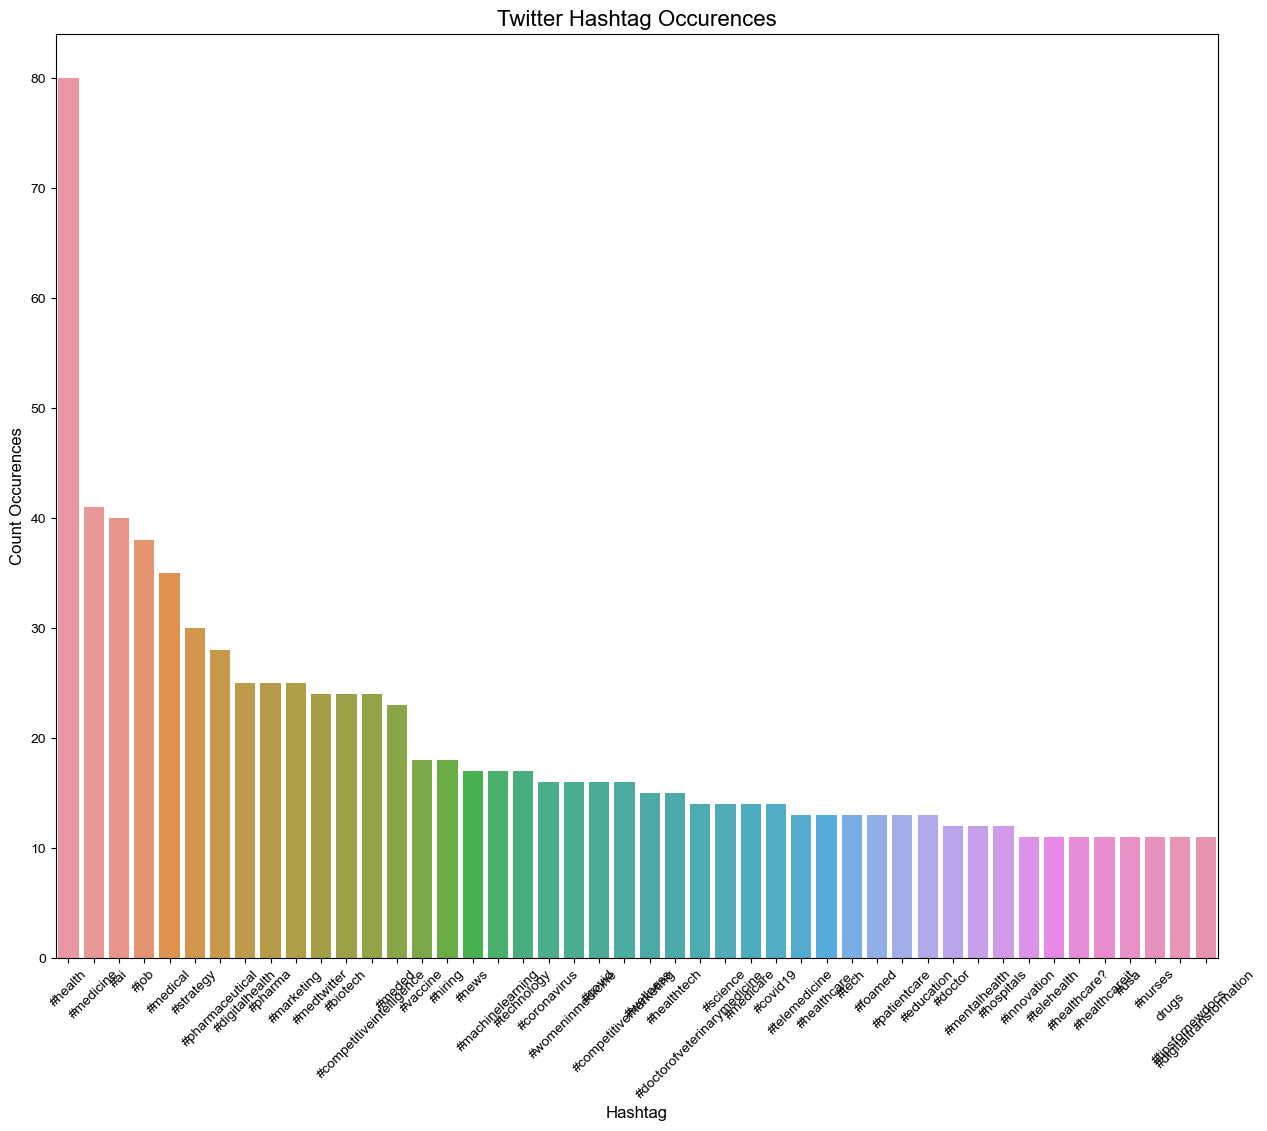

In [144]:
# Create a barplot of highest occuring hasgtags.
# Create data frame for chart data, count > 10.
chart_data = pd.DataFrame(tags_count) [(tags_count['count'] > 10) & (tags_count['count'] < 100)]


# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
plt.style.use('seaborn-v0_8-white')

sns.barplot(x = 'text', y = 'count', data = chart_data,
            errorbar = None).set_title("Twitter Hashtag Occurences",
                                                           fontsize = 16)

ax.tick_params(axis='x', labelrotation = 45)

ax.set_xlabel("Hashtag", fontsize = 12)
ax.set_ylabel("Count Occurences", fontsize = 12)



Text(0, 0.5, 'Count Occurences')

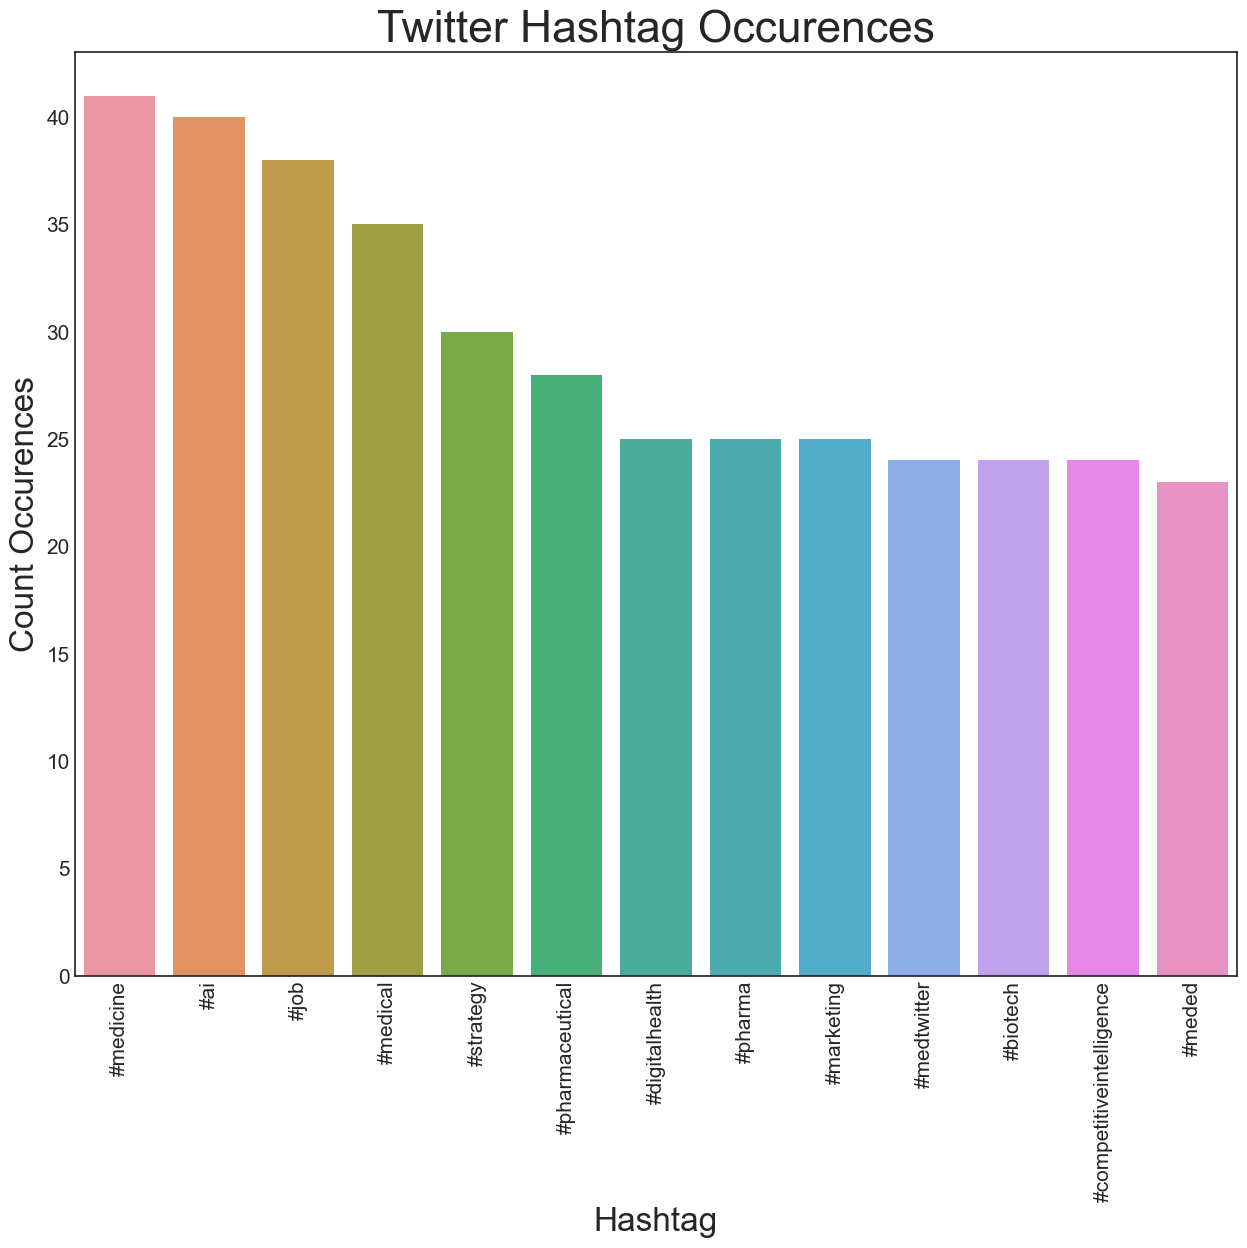

In [145]:
# Create a barplot of highest occuring hasgtags.
# Create data frame for chart data, count > 10.
chart_data1 = pd.DataFrame(tags_count) [(tags_count['count'] > 20) & (tags_count['count'] < 50)]


# Create an empty plot and set plot size.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
plt.style.use('seaborn-v0_8-white')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

sns.barplot(x = 'text', y = 'count', data = chart_data1,
            errorbar = None).set_title("Twitter Hashtag Occurences",
                                                           fontsize = 32)

ax.tick_params(axis='x', labelrotation = 90)

ax.set_xlabel("Hashtag", fontsize = 24)
ax.set_ylabel("Count Occurences", fontsize = 24)





## Week 6

### Setup

In [146]:
# Import the data files from CSV and Excel formats.
ar = pd.read_csv('appointments_regional.csv')

In [147]:
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [148]:
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [149]:
# Change data types for appointments_regional data file.
# Object to datetime.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'],format='%Y-%m').dt.to_period('M')

# Int to float.
ar['count_of_appointments'] = ar['count_of_appointments'].astype('float')

# Check columns, data types and non-null values.
print(ar.info())

# View ten random records to check date and number converted correctly.
ar[['appointment_month', 'count_of_appointments']].sample(n = 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype    
---  ------                             --------------   -----    
 0   icb_ons_code                       596821 non-null  object   
 1   appointment_month                  596821 non-null  period[M]
 2   appointment_status                 596821 non-null  object   
 3   hcp_type                           596821 non-null  object   
 4   appointment_mode                   596821 non-null  object   
 5   time_between_book_and_appointment  596821 non-null  object   
 6   count_of_appointments              596821 non-null  float64  
dtypes: float64(1), object(5), period[M](1)
memory usage: 31.9+ MB
None


,appointment_month,count_of_appointments
23737,2021-08,18.0
521924,2022-04,6.0
2584,2021-02,12.0
499692,2021-11,152.0
532780,2021-05,70.0
121046,2021-10,8.0
457261,2020-03,27.0
449990,2020-06,33.0
238208,2020-07,3655.0
120341,2021-06,9.0


In [150]:
# Print min and max dates.
print("Min value of appointment_month =", ar['appointment_month'].min())
print("Max value of appointment_month =", ar['appointment_month'].max())

Min value of appointment_month = 2020-01
Max value of appointment_month = 2022-06


In [151]:
# Create a subset where date 2021-08 onwards.
ar_subset = ar[ar['appointment_month'] >= '2021-08']
ar_subset.sample(n = 10)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
259179,E54000013,2021-10,DNA,Unknown,Telephone,Same Day,19.0
384047,E54000053,2021-09,Attended,GP,Home Visit,Same Day,362.0
590143,E54000050,2021-11,DNA,GP,Telephone,2 to 7 Days,183.0
235697,E54000057,2021-12,Attended,Other Practice staff,Face-to-Face,15 to 21 Days,2235.0
274904,E54000015,2021-10,DNA,GP,Telephone,2 to 7 Days,49.0
551676,E54000059,2021-11,Unknown,Other Practice staff,Video/Online,1 Day,1.0
469273,E54000022,2021-11,Unknown,Other Practice staff,Telephone,22 to 28 Days,126.0
143789,E54000054,2022-02,Unknown,Unknown,Unknown,22 to 28 Days,19.0
4801,E54000034,2022-01,Unknown,Other Practice staff,Unknown,8 to 14 Days,74.0
271067,E54000015,2022-04,Unknown,Unknown,Unknown,Same Day,28.0


In [152]:
# Print min and max dates.
print("Min value of appointment_month =", ar_subset['appointment_month'].min())
print("Max value of appointment_month =", ar_subset['appointment_month'].max())

Min value of appointment_month = 2021-08
Max value of appointment_month = 2022-06


### Q1 Should the NHS start looking at increasing staff levels?

In [153]:
# Create a new data frame with required data.
temp_df = pd.DataFrame(data = ar_subset, columns = ['appointment_month', 'hcp_type',
                                                    'appointment_status', 'appointment_mode',
                                                    'time_between_book_and_appointment',
                                                    'count_of_appointments']).reset_index()

ar_agg = pd.DataFrame(data = temp_df, columns = ['appointment_month', 'hcp_type',
                                                 'appointment_status', 'appointment_mode',
                                                 'time_between_book_and_appointment',
                                                 'count_of_appointments'])
ar_agg.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,6553.0
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,2390.0
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,10547.0
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,937.0
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,4961.0


#### Determine average utilisation of services

In [154]:
# Create subset of appointments by month.
ar_df = ar_agg.copy().drop(columns = ['hcp_type', 'appointment_status', 'appointment_mode',
                             'time_between_book_and_appointment'], axis = 1)

In [155]:
ar_df

,appointment_month,count_of_appointments
0,2021-08,6553.0
1,2021-08,2390.0
2,2021-08,10547.0
3,2021-08,937.0
4,2021-08,4961.0
...,...,...
223413,2022-06,21.0
223414,2022-06,8.0
223415,2022-06,28.0
223416,2022-06,17.0


In [156]:
ar_util = ar_df.groupby('appointment_month').sum().reset_index()

In [157]:
ar_util

,appointment_month,count_of_appointments
0,2021-08,23852171.0
1,2021-09,28522501.0
2,2021-10,30303834.0
3,2021-11,30405070.0
4,2021-12,25140776.0
5,2022-01,25635474.0
6,2022-02,25355260.0
7,2022-03,29595038.0
8,2022-04,23913060.0
9,2022-05,27495508.0


In [158]:
ar_util['actual_per_day'] = ar_util['count_of_appointments'] / 30
ar_util

,appointment_month,count_of_appointments,actual_per_day
0,2021-08,23852171.0,7.950724e+05
1,2021-09,28522501.0,9.507500e+05
2,2021-10,30303834.0,1.010128e+06
3,2021-11,30405070.0,1.013502e+06
4,2021-12,25140776.0,8.380259e+05
5,2022-01,25635474.0,8.545158e+05
6,2022-02,25355260.0,8.451753e+05
7,2022-03,29595038.0,9.865013e+05
8,2022-04,23913060.0,7.971020e+05
9,2022-05,27495508.0,9.165169e+05


In [159]:
ar_util['capacity_per_day'] = 1200000
ar_util

,appointment_month,count_of_appointments,actual_per_day,capacity_per_day
0,2021-08,23852171.0,7.950724e+05,1200000
1,2021-09,28522501.0,9.507500e+05,1200000
2,2021-10,30303834.0,1.010128e+06,1200000
3,2021-11,30405070.0,1.013502e+06,1200000
4,2021-12,25140776.0,8.380259e+05,1200000
5,2022-01,25635474.0,8.545158e+05,1200000
6,2022-02,25355260.0,8.451753e+05,1200000
7,2022-03,29595038.0,9.865013e+05,1200000
8,2022-04,23913060.0,7.971020e+05,1200000
9,2022-05,27495508.0,9.165169e+05,1200000


In [160]:
ar_util['utilisation'] = (ar_util['actual_per_day'] /ar_util['capacity_per_day']) * 100
ar_util

,appointment_month,count_of_appointments,actual_per_day,capacity_per_day,utilisation
0,2021-08,23852171.0,7.950724e+05,1200000,66.256031
1,2021-09,28522501.0,9.507500e+05,1200000,79.229169
2,2021-10,30303834.0,1.010128e+06,1200000,84.177317
3,2021-11,30405070.0,1.013502e+06,1200000,84.458528
4,2021-12,25140776.0,8.380259e+05,1200000,69.835489
5,2022-01,25635474.0,8.545158e+05,1200000,71.209650
6,2022-02,25355260.0,8.451753e+05,1200000,70.431278
7,2022-03,29595038.0,9.865013e+05,1200000,82.208439
8,2022-04,23913060.0,7.971020e+05,1200000,66.425167
9,2022-05,27495508.0,9.165169e+05,1200000,76.376411


In [161]:
ar_util.style.format({
    'utilisation': "{:.1f}",
    'count_of_appointments': "{:,.0f}",
    'actual_per_day': "{:,.0f}",
    'capacity_per_day': "{:,.0f}"
    })  

,appointment_month,count_of_appointments,actual_per_day,capacity_per_day,utilisation
0,2021-08,"23,852,171","795,072","1,200,000",66.3
1,2021-09,"28,522,501","950,750","1,200,000",79.2
2,2021-10,"30,303,834","1,010,128","1,200,000",84.2
3,2021-11,"30,405,070","1,013,502","1,200,000",84.5
4,2021-12,"25,140,776","838,026","1,200,000",69.8
5,2022-01,"25,635,474","854,516","1,200,000",71.2
6,2022-02,"25,355,260","845,175","1,200,000",70.4
7,2022-03,"29,595,038","986,501","1,200,000",82.2
8,2022-04,"23,913,060","797,102","1,200,000",66.4
9,2022-05,"27,495,508","916,517","1,200,000",76.4


In [162]:
ar_util = ar_util.replace([np.inf, -np.inf], np.nan)

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


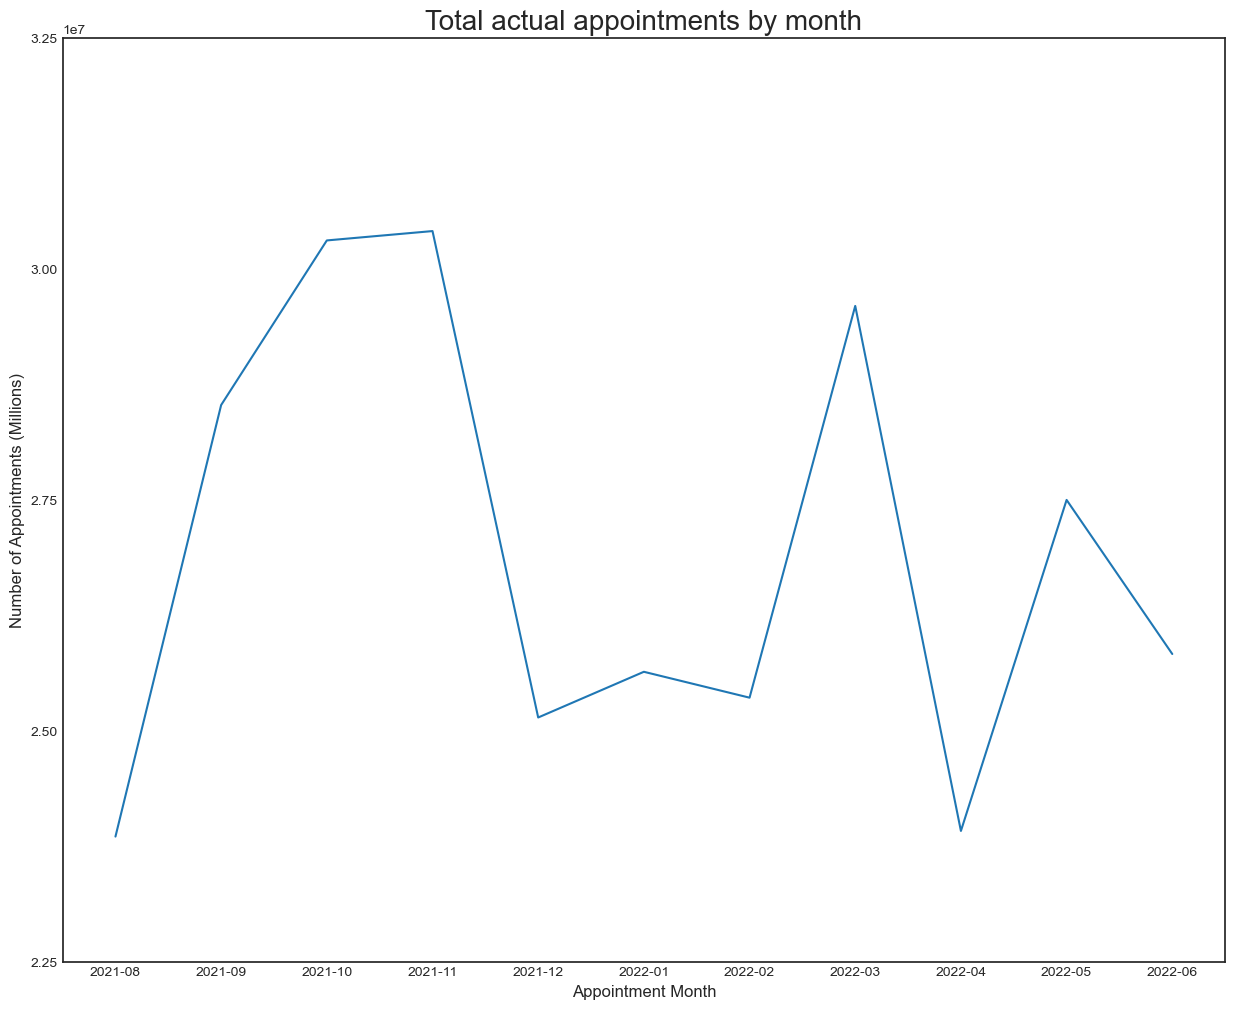

In [163]:
# Create a simple lineplot.

# Create an empty plot and set set up chart format and elements.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

plt.style.use('seaborn-v0_8-white')
plt.title("Total actual appointments by month", fontsize = 20)

ar_util['appointment_month'] = ar_util['appointment_month'].astype('str')
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = ar_util, errorbar = None)

ax.set_xlabel("Appointment Month", fontsize = 12)
ax.set_ylabel("Number of Appointments (Millions)", fontsize = 12)

ax.set_yticks([22500000, 25000000, 27500000, 30000000, 32500000])

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


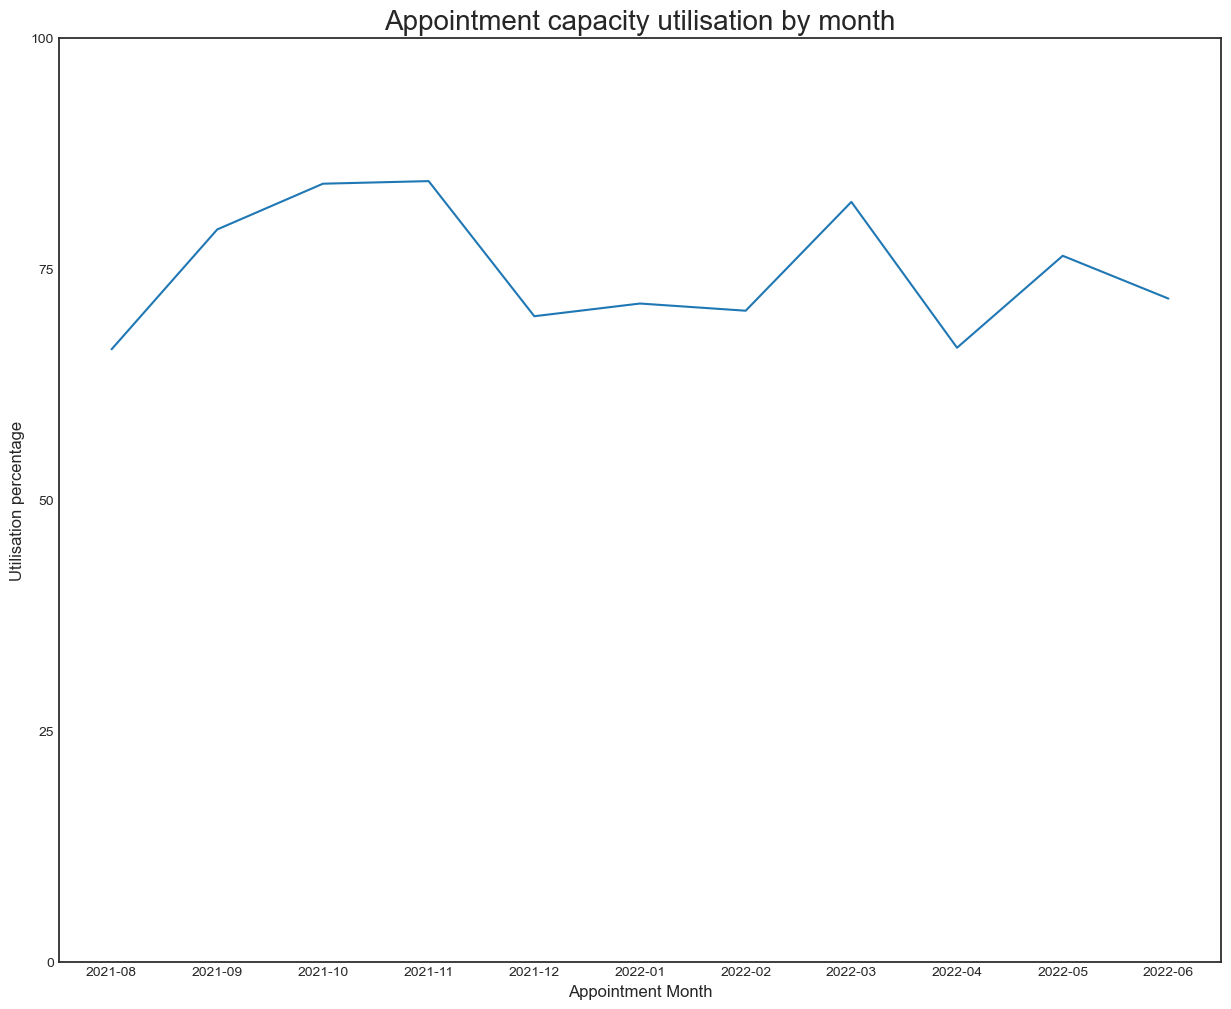

In [164]:
# Create a simple lineplot.

# Create an empty plot and set set up chart format and elements.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

plt.style.use('seaborn-v0_8-white')
plt.title("Appointment capacity utilisation by month", fontsize = 20)

ar_util['appointment_month'] = ar_util['appointment_month'].astype('str')
sns.lineplot(x = 'appointment_month', y = 'utilisation', data = ar_util, errorbar = None)

ax.set_xlabel("Appointment Month", fontsize = 12)
ax.set_ylabel("Utilisation percentage", fontsize = 12)

ax.set_yticks([0, 25, 50, 75, 100])

### Q2 How do the healthcare professional types differ over time?

In [165]:
# Create subset of appointments by month.
ar_df1 = ar_agg.copy().drop(columns = ['appointment_status', 'appointment_mode',
                             'time_between_book_and_appointment'], axis = 1)

In [166]:
ar_df1

,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,6553.0
1,2021-08,GP,2390.0
2,2021-08,GP,10547.0
3,2021-08,GP,937.0
4,2021-08,GP,4961.0
...,...,...,...
223413,2022-06,Unknown,21.0
223414,2022-06,Unknown,8.0
223415,2022-06,Unknown,28.0
223416,2022-06,Unknown,17.0


In [167]:
ar_hcp = ar_df1.groupby(['appointment_month', 'hcp_type']).sum().reset_index()

In [168]:
ar_hcp

,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,12299022.0
1,2021-08,Other Practice staff,10797821.0
2,2021-08,Unknown,755328.0
3,2021-09,GP,14487785.0
4,2021-09,Other Practice staff,13126731.0
5,2021-09,Unknown,907985.0
6,2021-10,GP,14300751.0
7,2021-10,Other Practice staff,14942504.0
8,2021-10,Unknown,1060579.0
9,2021-11,GP,14897749.0


In [169]:
ar_hcp.style.format({
    'count_of_appointments': "{:,.0f}"
    })

,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,"12,299,022"
1,2021-08,Other Practice staff,"10,797,821"
2,2021-08,Unknown,"755,328"
3,2021-09,GP,"14,487,785"
4,2021-09,Other Practice staff,"13,126,731"
5,2021-09,Unknown,"907,985"
6,2021-10,GP,"14,300,751"
7,2021-10,Other Practice staff,"14,942,504"
8,2021-10,Unknown,"1,060,579"
9,2021-11,GP,"14,897,749"


In [170]:
# Print min and max dates.
print("Min value of count_of_appointments =", ar_hcp['count_of_appointments'].min())
print("Max value of count_of_appointments =", ar_hcp['count_of_appointments'].max())

Min value of count_of_appointments = 755328.0
Max value of count_of_appointments = 15127227.0


/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


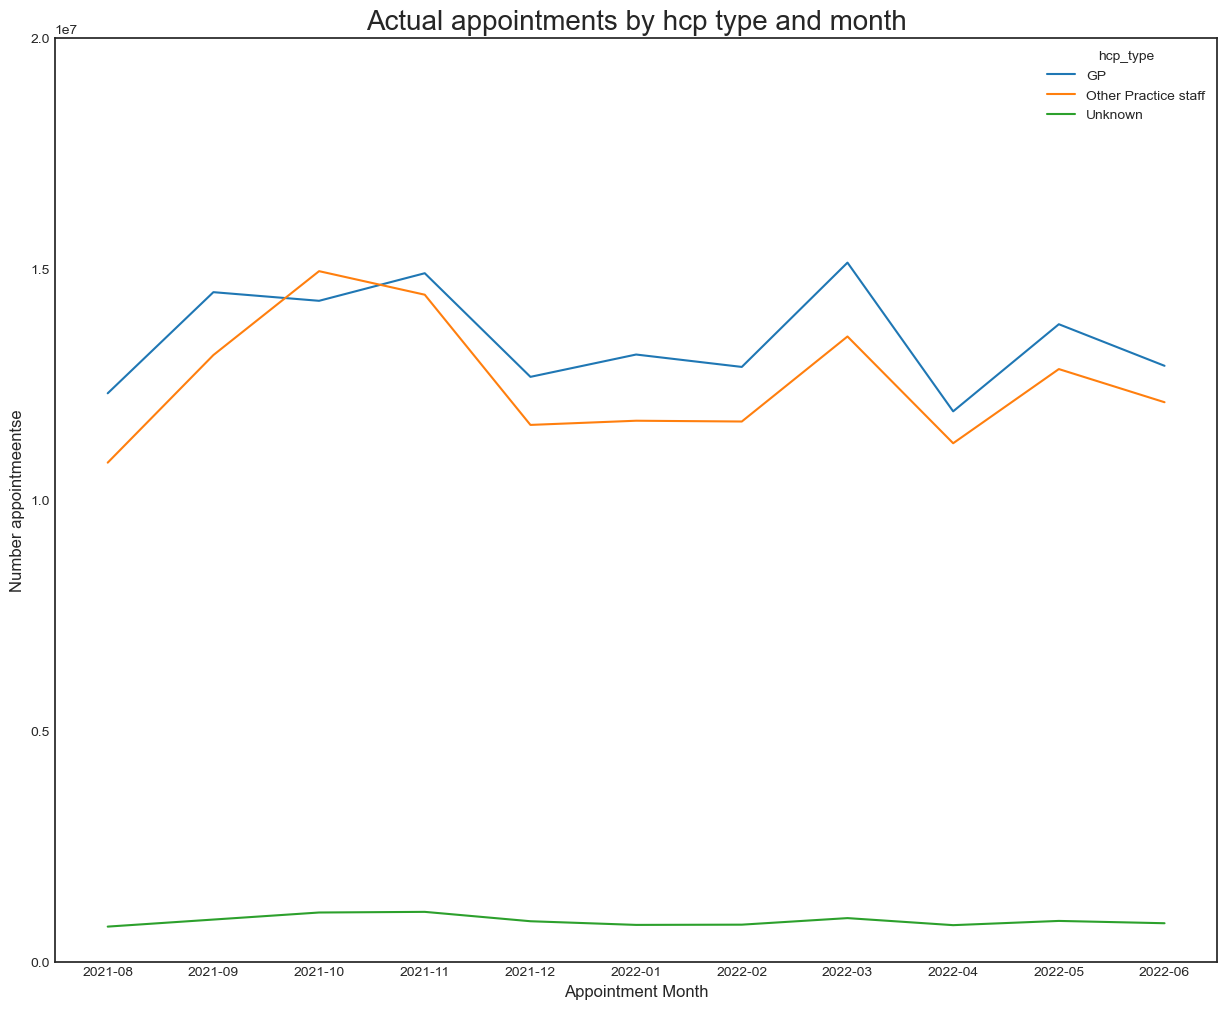

In [171]:
# Create a simple lineplot.

# Create an empty plot and set set up chart format and elements.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

plt.style.use('seaborn-v0_8-white')
plt.title("Actual appointments by hcp type and month", fontsize = 20)

ar_hcp['appointment_month'] = ar_hcp['appointment_month'].astype('str')
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'hcp_type', data = ar_hcp, errorbar = None)

ax.set_xlabel("Appointment Month", fontsize = 12)
ax.set_ylabel("Number appointmeentse", fontsize = 12)

ax.set_yticks([0, 5000000, 10000000, 15000000, 20000000])

### Q3 Are there significant changes in whether or not visits are attended?

In [172]:
ar_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223418 entries, 0 to 223417
Data columns (total 6 columns):
 #   Column                             Non-Null Count   Dtype    
---  ------                             --------------   -----    
 0   appointment_month                  223418 non-null  period[M]
 1   hcp_type                           223418 non-null  object   
 2   appointment_status                 223418 non-null  object   
 3   appointment_mode                   223418 non-null  object   
 4   time_between_book_and_appointment  223418 non-null  object   
 5   count_of_appointments              223418 non-null  float64  
dtypes: float64(1), object(4), period[M](1)
memory usage: 10.2+ MB


In [173]:
# Create subset of appointments by month.
ar_df2 = ar_agg.copy().drop(columns = ['hcp_type', 'appointment_mode',
                             'time_between_book_and_appointment'], axis = 1)
ar_df2

,appointment_month,appointment_status,count_of_appointments
0,2021-08,Attended,6553.0
1,2021-08,Attended,2390.0
2,2021-08,Attended,10547.0
3,2021-08,Attended,937.0
4,2021-08,Attended,4961.0
...,...,...,...
223413,2022-06,Unknown,21.0
223414,2022-06,Unknown,8.0
223415,2022-06,Unknown,28.0
223416,2022-06,Unknown,17.0


In [174]:
ar_DNA = ar_df2[ar_df2['appointment_status'] == 'DNA']
ar_DNA


,appointment_month,appointment_status,count_of_appointments
78,2021-08,DNA,259.0
79,2021-08,DNA,175.0
80,2021-08,DNA,536.0
81,2021-08,DNA,78.0
82,2021-08,DNA,335.0
...,...,...,...
223353,2022-06,DNA,8.0
223354,2022-06,DNA,1.0
223355,2022-06,DNA,7.0
223356,2022-06,DNA,2.0


In [175]:
ar_DNA.drop('appointment_status', axis = 1)


,appointment_month,count_of_appointments
78,2021-08,259.0
79,2021-08,175.0
80,2021-08,536.0
81,2021-08,78.0
82,2021-08,335.0
...,...,...
223353,2022-06,8.0
223354,2022-06,1.0
223355,2022-06,7.0
223356,2022-06,2.0


In [176]:
ar_DNA.reset_index()

,index,appointment_month,appointment_status,count_of_appointments
0,78,2021-08,DNA,259.0
1,79,2021-08,DNA,175.0
2,80,2021-08,DNA,536.0
3,81,2021-08,DNA,78.0
4,82,2021-08,DNA,335.0
...,...,...,...,...
62323,223353,2022-06,DNA,8.0
62324,223354,2022-06,DNA,1.0
62325,223355,2022-06,DNA,7.0
62326,223356,2022-06,DNA,2.0


In [177]:
ar_DNA2 = pd.DataFrame(data = ar_DNA, columns = ['appointment_month', 'count_of_appointments'])

In [178]:
ar_DNA2

,appointment_month,count_of_appointments
78,2021-08,259.0
79,2021-08,175.0
80,2021-08,536.0
81,2021-08,78.0
82,2021-08,335.0
...,...,...
223353,2022-06,8.0
223354,2022-06,1.0
223355,2022-06,7.0
223356,2022-06,2.0


In [179]:
ar_DNA3 = ar_DNA2.groupby('appointment_month').sum().reset_index()
ar_DNA3

,appointment_month,count_of_appointments
0,2021-08,949137.0
1,2021-09,1321348.0
2,2021-10,1565624.0
3,2021-11,1428087.0
4,2021-12,1198866.0
5,2022-01,1076013.0
6,2022-02,1076658.0
7,2022-03,1289888.0
8,2022-04,1045455.0
9,2022-05,1199518.0


In [180]:
ar_DNA3['count_of_appointments'].max()

1565624.0

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


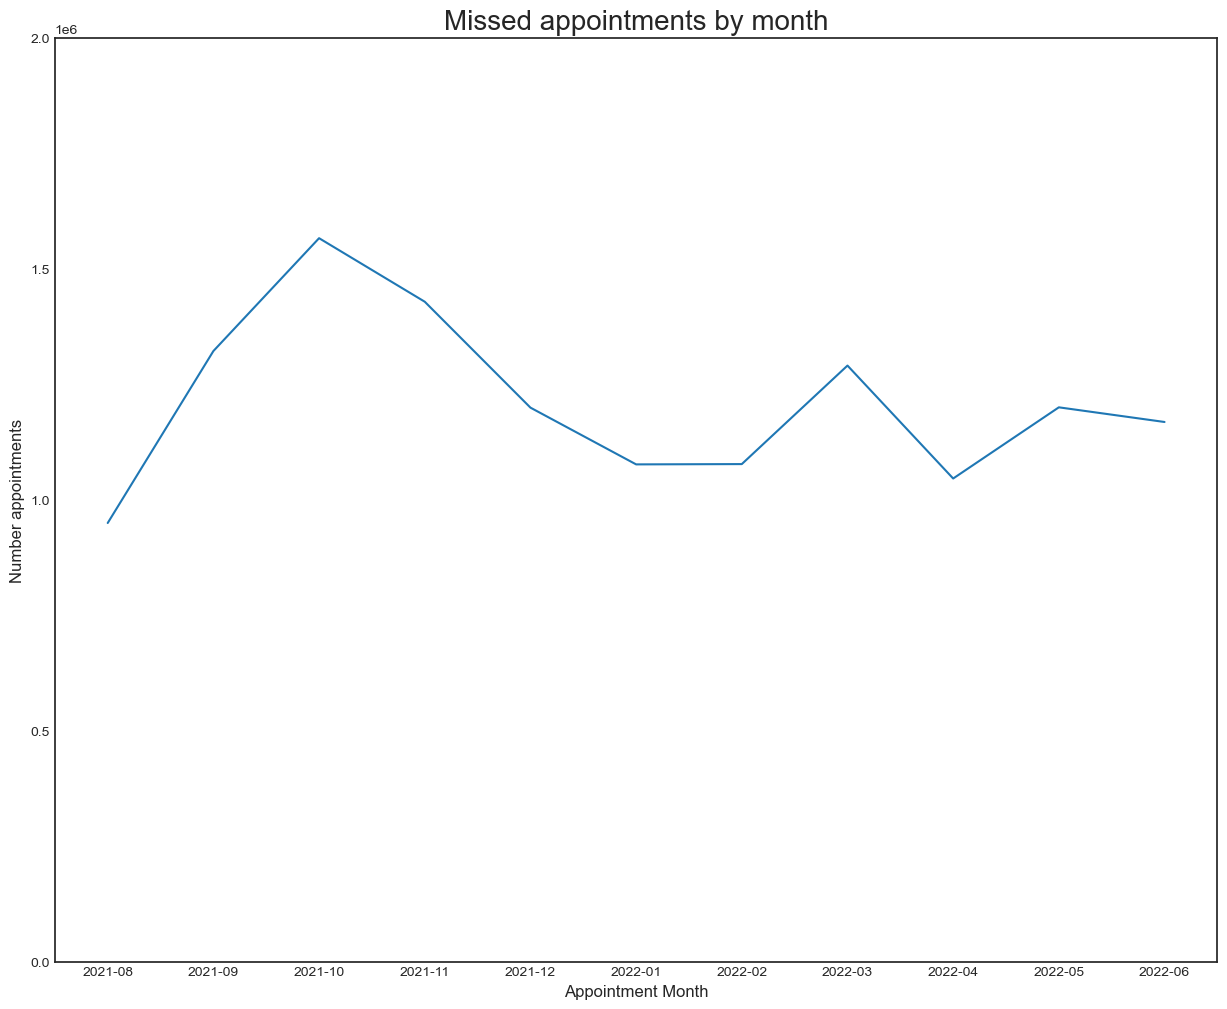

In [181]:
# Create a simple lineplot.

# Create an empty plot and set set up chart format and elements.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

plt.style.use('seaborn-v0_8-white')
plt.title("Missed appointments by month", fontsize = 20)

ar_DNA3['appointment_month'] = ar_DNA3['appointment_month'].astype('str')
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', data = ar_DNA3, errorbar = None)

ax.set_xlabel("Appointment Month", fontsize = 12)
ax.set_ylabel("Number appointments", fontsize = 12)

ax.set_yticks([0, 500000, 1000000, 1500000, 2000000])

### Q4. Are there changes in terms of appointment type and the busiest months?

In [182]:
# Create subset of appointments by month.
ar_df3 = ar_agg.copy().drop(columns = ['hcp_type', 'appointment_status', 'time_between_book_and_appointment'], axis = 1)
ar_df3

,appointment_month,appointment_mode,count_of_appointments
0,2021-08,Face-to-Face,6553.0
1,2021-08,Face-to-Face,2390.0
2,2021-08,Face-to-Face,10547.0
3,2021-08,Face-to-Face,937.0
4,2021-08,Face-to-Face,4961.0
...,...,...,...
223413,2022-06,Unknown,21.0
223414,2022-06,Unknown,8.0
223415,2022-06,Unknown,28.0
223416,2022-06,Unknown,17.0


In [183]:
ar_mode = ar_df3.groupby(['appointment_month', 'appointment_mode']).sum().reset_index()
ar_mode

,appointment_month,appointment_mode,count_of_appointments
0,2021-08,Face-to-Face,13717325.0
1,2021-08,Home Visit,151619.0
2,2021-08,Telephone,9149072.0
3,2021-08,Unknown,724126.0
4,2021-08,Video/Online,110029.0
5,2021-09,Face-to-Face,17266602.0
6,2021-09,Home Visit,171829.0
7,2021-09,Telephone,10068770.0
8,2021-09,Unknown,859946.0
9,2021-09,Video/Online,155354.0


In [184]:
ar_mode.style.format({
    'count_of_appointments': "{:,.0f}"
    })

,appointment_month,appointment_mode,count_of_appointments
0,2021-08,Face-to-Face,"13,717,325"
1,2021-08,Home Visit,"151,619"
2,2021-08,Telephone,"9,149,072"
3,2021-08,Unknown,"724,126"
4,2021-08,Video/Online,"110,029"
5,2021-09,Face-to-Face,"17,266,602"
6,2021-09,Home Visit,"171,829"
7,2021-09,Telephone,"10,068,770"
8,2021-09,Unknown,"859,946"
9,2021-09,Video/Online,"155,354"


In [185]:
ar_mode['count_of_appointments'].max()

19471561.0

/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/genaferguson/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


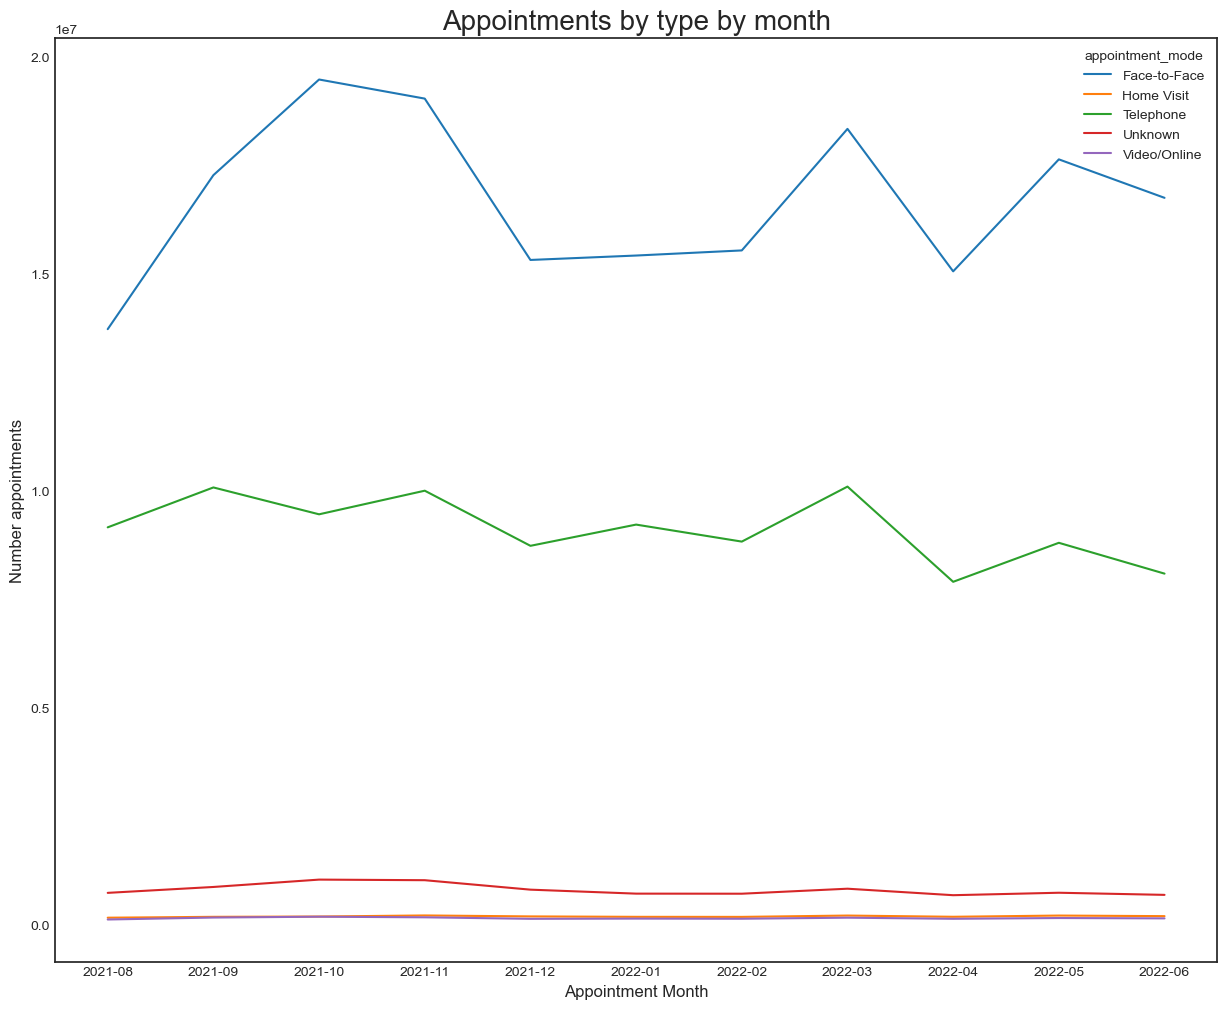

In [186]:
# Create a simple lineplot.

# Create an empty plot and set set up chart format and elements.
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)

plt.style.use('seaborn-v0_8-white')
plt.title("Appointments by type by month", fontsize = 20)

ar_mode['appointment_month'] = ar_mode['appointment_month'].astype('str')
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments', hue = 'appointment_mode',
             data = ar_mode, errorbar = None)

ax.set_xlabel("Appointment Month", fontsize = 12)
ax.set_ylabel("Number appointments", fontsize = 12)

ax.set_yticks([0, 5000000, 10000000, 15000000, 20000000])

In [187]:
ar_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223418 entries, 0 to 223417
Data columns (total 6 columns):
 #   Column                             Non-Null Count   Dtype    
---  ------                             --------------   -----    
 0   appointment_month                  223418 non-null  period[M]
 1   hcp_type                           223418 non-null  object   
 2   appointment_status                 223418 non-null  object   
 3   appointment_mode                   223418 non-null  object   
 4   time_between_book_and_appointment  223418 non-null  object   
 5   count_of_appointments              223418 non-null  float64  
dtypes: float64(1), object(4), period[M](1)
memory usage: 10.2+ MB


#### How do the number of appts by month campare between data sets for the overlapping time period of 2021-12 to 2022-06

In [188]:
# Create subset of appts by month for 2021-12 to 2022-06.
ad_by_month = pd.DataFrame(data = ad[['appointment_month', 'count_of_appointments']])\
    .groupby('appointment_month').sum()
ad_by_month

,count_of_appointments
appointment_month,
2021-12,22853483.0
2022-01,23597196.0
2022-02,23351939.0
2022-03,27170002.0
2022-04,21948814.0
2022-05,25343941.0
2022-06,23715317.0


In [189]:
# Create subset of appts by month for 2021-12 to 2022-06.
nc_overlap = pd.DataFrame(nc, columns = ['appointment_month', 'count_of_appointments']) [(nc['appointment_month'] >= '2021-12') &
    (nc['appointment_month'] <= '2022-06')]
nc_by_month = nc_overlap.groupby('appointment_month').sum()
nc_by_month

,count_of_appointments
appointment_month,
2021-12,25140776.0
2022-01,25635474.0
2022-02,25355260.0
2022-03,29595038.0
2022-04,23913060.0
2022-05,27495508.0
2022-06,25828078.0


In [190]:
# Create subset of appts by month for 2021-12 to 2022-06.
ar_overlap = pd.DataFrame(ar, columns = ['appointment_month', 'count_of_appointments']) [(ar['appointment_month'] >= '2021-12') &
    (ar['appointment_month'] <= '2022-06')]
ar_by_month = ar_overlap.groupby('appointment_month').sum()
ar_by_month

,count_of_appointments
appointment_month,
2021-12,25140776.0
2022-01,25635474.0
2022-02,25355260.0
2022-03,29595038.0
2022-04,23913060.0
2022-05,27495508.0
2022-06,25828078.0


In [191]:
# Merge the three data subsets together for visualisation and analysis.
consolidated = pd.concat([ad_by_month, ar_by_month, nc_by_month], axis = 1,
                        names = ['ad', 'ar', 'nc'])
consolidated

,count_of_appointments,count_of_appointments,count_of_appointments
appointment_month,,,
2021-12,22853483.0,25140776.0,25140776.0
2022-01,23597196.0,25635474.0,25635474.0
2022-02,23351939.0,25355260.0,25355260.0
2022-03,27170002.0,29595038.0,29595038.0
2022-04,21948814.0,23913060.0,23913060.0
2022-05,25343941.0,27495508.0,27495508.0
2022-06,23715317.0,25828078.0,25828078.0
